# Step 1: Reading, Understanding and Visualising the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Total number of Rows and Columns
housing_df.shape

(1460, 81)

### 1.a) Handling Missing Values

In [4]:
# As number of rows are way too less so, will treating missing values by imputation and remov of some observations if required

In [5]:
# Null Values in Columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# We do see th there are null values so, let us find the sum of null Values for first 40 columns
housing_df.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [7]:
# Missing Value Treatment
# 1) We go for LotFrontage which is a numerical variable and hence if there is an outlier then, will go for median else for mean

In [8]:
housing_df[['LotFrontage']].describe(percentiles = [0.01,0.02,0.05,0.1,0.9,0.95,0.99]).T

,count,mean,std,min,1%,2%,5%,10%,50%,90%,95%,99%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,21.0,24.0,34.0,44.0,69.0,96.0,107.0,141.0,313.0


In [9]:
# Now, we see the value to be 313 and though the 99% value is 141 so, here we will impute the NA values with median
housing_df.loc[np.isnan(housing_df['LotFrontage']),['LotFrontage']] = housing_df['LotFrontage'].median()

In [10]:
housing_df.isnull().sum().head(40)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [11]:
# If we see Alley; it is a Categorical variable where in NA means no alley so, replacing it this value
housing_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
housing_df['Alley'] = housing_df['Alley'].fillna(value = 'No Alley')

In [13]:
housing_df['Alley'].head(20)

0     No Alley
1     No Alley
2     No Alley
3     No Alley
4     No Alley
5     No Alley
6     No Alley
7     No Alley
8     No Alley
9     No Alley
10    No Alley
11    No Alley
12    No Alley
13    No Alley
14    No Alley
15    No Alley
16    No Alley
17    No Alley
18    No Alley
19    No Alley
Name: Alley, dtype: object

In [14]:
housing_df.isnull().sum().head(40)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
dtype: int64

In [15]:
# Next we go for BsmtQual, BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 which are categorical variables
housing_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [16]:
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna(value = 'No Basement')
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna(value = 'No Basement')
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna(value = 'No Basement')

In [17]:
housing_df['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [18]:
housing_df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [19]:
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna(value = 'No Basement')

In [20]:
housing_df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [21]:
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna(value = 'No Basement')

In [22]:
housing_df.isnull().sum().head(40)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      8
MasVnrArea      8
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
dtype: int64

In [23]:
# Now here MasVnrType is a categorical variable while MasVnrArea is a Numerical Variable
housing_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [24]:
# Now as None is the highest so am relacing NA with None that is mode way
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna(value = 'None')

In [25]:
# Now my value of None must increase by 8 counts
housing_df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [26]:
housing_df[['MasVnrArea']].describe(percentiles = [0.01,0.02,0.05,0.1,0.9,0.95,0.99]).T

,count,mean,std,min,1%,2%,5%,10%,50%,90%,95%,99%,max
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,0.0,0.0,0.0,335.0,456.0,791.92,1600.0


In [27]:
# It will be great if I update the NA with Median and not with Mean as Max value is quite outstanding 1600
housing_df.loc[np.isnan(housing_df['MasVnrArea']),['MasVnrArea']] = housing_df['MasVnrArea'].median()

In [28]:
# Now quickly finding the percentage of null values for rest of the columns
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False).head(40)

PoolQC          99.52
MiscFeature     96.30
Fence           80.75
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
Electrical       0.07
Exterior1st      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
MasVnrType       0.00
Exterior2nd      0.00
OverallQual      0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
OverallCond      0.00
SalePrice        0.00
HouseStyle       0.00
BldgType         0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
dtype: float64

In [29]:
# Looking at PoolQC,MiscFeature,Fence,FireplaceQu First; We see that all 4 are categorical variables
housing_df['PoolQC'] = housing_df['PoolQC'].fillna(value = 'No Pool')
housing_df['MiscFeature'] = housing_df['MiscFeature'].fillna(value = 'None')
housing_df['Fence'] = housing_df['Fence'].fillna(value = 'No Fence')
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna(value = 'No Fireplace')

In [30]:
# Now checking %age of missing values in descending order
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False).head(40)

GarageYrBlt     5.55
GarageCond      5.55
GarageFinish    5.55
GarageQual      5.55
GarageType      5.55
Electrical      0.07
BsmtCond        0.00
YearBuilt       0.00
BsmtFinSF1      0.00
YearRemodAdd    0.00
RoofStyle       0.00
BsmtFinType1    0.00
BsmtExposure    0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
OverallCond     0.00
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.00
MasVnrArea      0.00
SalePrice       0.00
OverallQual     0.00
LandContour     0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
Alley           0.00
LotShape        0.00
Utilities       0.00
BsmtFinSF2      0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
dtype: float64

In [31]:
# All seems to be Categorical variable and hence will update with Mode or with "No partcular category"
# GarageYrBlt
# GarageCond
# GarageFinish
# GarageQual
# GarageType

In [31]:
housing_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [32]:
# As we cannot predict GarageYrBlt so removing those NA rows and most probably it will help in all rest of the 4 Garage Columns mentioned above
housing_df = housing_df[~np.isnan(housing_df['GarageYrBlt'])]

In [33]:
# Total number of Rows reduced after removing NAN Rows
housing_df.shape

(1379, 81)

In [34]:
# Now checking %age of missing values in descending order
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False).head(40)

Electrical      0.07
SalePrice       0.00
Foundation      0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
ExterQual       0.00
ExterCond       0.00
BsmtQual        0.00
YearRemodAdd    0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
BsmtFinSF2      0.00
BsmtUnfSF       0.00
RoofStyle       0.00
YearBuilt       0.00
Heating         0.00
OverallCond     0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
Alley           0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
dtype: float64

In [35]:
housing_df['Electrical'].value_counts()

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [36]:
housing_df['Electrical'].isnull().sum()

1

In [37]:
# Now checking %age of missing values in descending order
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False).head(40)

Electrical      0.07
SalePrice       0.00
Foundation      0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
ExterQual       0.00
ExterCond       0.00
BsmtQual        0.00
YearRemodAdd    0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
BsmtFinSF2      0.00
BsmtUnfSF       0.00
RoofStyle       0.00
YearBuilt       0.00
Heating         0.00
OverallCond     0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
Alley           0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
dtype: float64

In [38]:
housing_df.dropna(subset=['Electrical'], inplace=True)

In [39]:
# Now checking %age of missing values in descending order
round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False).head(40)

SalePrice       0.0
Heating         0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
YearRemodAdd    0.0
YearBuilt       0.0
OverallCond     0.0
LandContour     0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
Alley           0.0
LotShape        0.0
Utilities       0.0
OverallQual     0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
TotalBsmtSF     0.0
dtype: float64

In [40]:
housing_df['Electrical'].value_counts()

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [41]:
# So, now after imputing values and dropping some rows and observations, checking null values again
# Null Values in Columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1378 non-null   int64  
 1   MSSubClass     1378 non-null   int64  
 2   MSZoning       1378 non-null   object 
 3   LotFrontage    1378 non-null   float64
 4   LotArea        1378 non-null   int64  
 5   Street         1378 non-null   object 
 6   Alley          1378 non-null   object 
 7   LotShape       1378 non-null   object 
 8   LandContour    1378 non-null   object 
 9   Utilities      1378 non-null   object 
 10  LotConfig      1378 non-null   object 
 11  LandSlope      1378 non-null   object 
 12  Neighborhood   1378 non-null   object 
 13  Condition1     1378 non-null   object 
 14  Condition2     1378 non-null   object 
 15  BldgType       1378 non-null   object 
 16  HouseStyle     1378 non-null   object 
 17  OverallQual    1378 non-null   int64  
 18  OverallC

In [42]:
# Dropping ID column for now
housing_df = housing_df.drop(['Id'], axis = 1)

In [43]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [44]:
# Statistical analysis of numerical variables
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,...,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,56.005080,70.373730,10696.509434,6.187954,5.578374,1972.934688,1985.419448,108.443396,455.909289,48.137155,...,97.455007,47.310595,21.054427,3.612482,15.957184,2.923077,42.920174,6.335269,2007.812046,185492.558781
std,41.036701,21.948784,10218.377673,1.345889,1.081311,29.377049,20.444010,184.238932,459.694234,164.379207,...,126.745170,65.221688,60.554428,30.165473,57.268764,41.350477,501.794706,2.697413,1.330695,79051.093697
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7740.500000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.000000
50%,50.000000,69.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,0.000000,...,0.000000,27.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167700.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,2001.000000,2004.000000,170.750000,732.000000,0.000000,...,171.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217875.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
#Out of these 37 cols MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,
#BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold sort of either categorical or ordinal variables

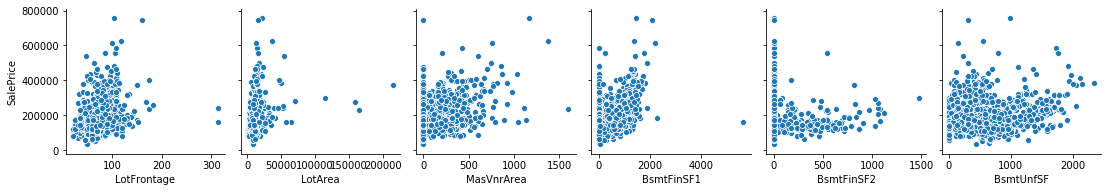

In [46]:
# Now as by pairplot on the entire df is not readable so creating slective variables pairplot though please note all numeric vars have not been selected
x_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']
y_vars = ['SalePrice']
sns.pairplot(housing_df,x_vars = x_vars,y_vars = y_vars)
plt.show()

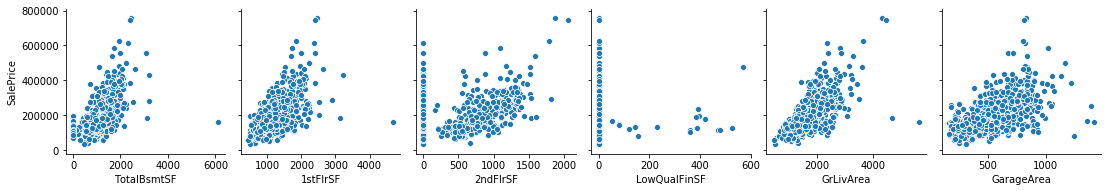

In [47]:
x_vars = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea']
y_vars = ['SalePrice']
sns.pairplot(housing_df,x_vars = x_vars,y_vars = y_vars)
plt.show()

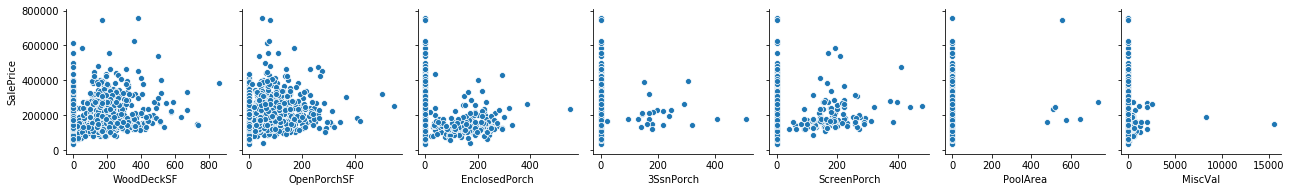

In [48]:
x_vars = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
y_vars = ['SalePrice']
sns.pairplot(housing_df,x_vars = x_vars,y_vars = y_vars)
plt.show()

In [49]:
# now after looking at these plots it seems i must go for some dervived metrics mentioned below
housing_df['NetBasementArea'] = housing_df['TotalBsmtSF']-housing_df['BsmtUnfSF']
housing_df['NetBasementArea'].head()

0    706
1    978
2    486
3    216
4    655
Name: NetBasementArea, dtype: int64

In [50]:
# Now dropping TotalBsmtSF and BsmtUnSF
housing_df = housing_df.drop(['TotalBsmtSF','BsmtUnfSF'], axis = 1)

In [51]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'E

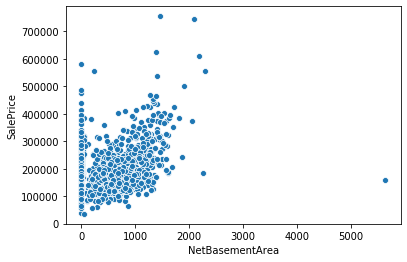

In [52]:
# Now plotting a scatter plot for SalePrice vs NetBasementArea
sns.scatterplot(data = housing_df, x='NetBasementArea', y='SalePrice')
plt.show()

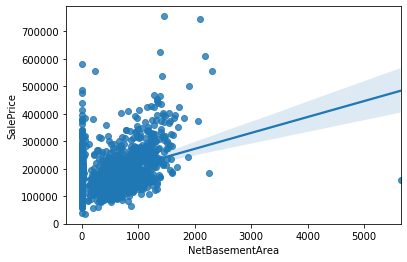

In [53]:
# Now plotting regplot in order to see correlation and one or two numerical variables
sns.regplot(x='NetBasementArea',y='SalePrice',data = housing_df)
plt.show()

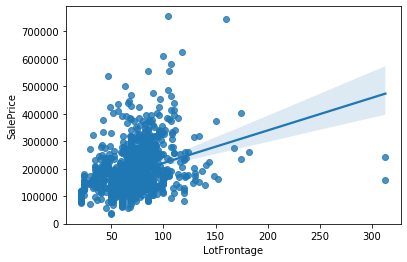

In [54]:
sns.regplot(x='LotFrontage',y='SalePrice',data = housing_df)
plt.show()

In [55]:
# so after treating missing values and plotting graphs for numeric vaiables these are the inferences that we have
# Inference 1: SalePrice is our Target Variable
# Inference 2: These are the Numerical Variables that we have around 19 numerical variable
# Inference 3: have created one derived metric for NetBasementArea which is Total Basement Area - unfinished Basement Area
# Inference 4: As I see that there seems to be Linear Relationship between SalePrice and some of the Predictors like LotFrontage, NetBasementArea..etc. so, we can go for Linear Regression
# These are the Numeric Vars that we have 
numeric_vars = ['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','NetBasementArea']

In [56]:
#Now Plotting correlation Matrix for these numerical variables
housing_df[['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','NetBasementArea']].corr()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,NetBasementArea
SalePrice,1.000000,0.329390,0.252911,0.463109,0.375540,-0.023292,0.595024,0.313498,-0.008382,0.708160,0.608392,0.312641,0.332986,-0.120229,0.039208,0.099411,0.091509,-0.017948,0.351984
LotFrontage,0.329390,1.000000,0.299059,0.175219,0.219248,0.040986,0.407705,0.066558,0.010961,0.361011,0.333081,0.070061,0.146514,0.013486,0.061233,0.032505,0.185176,-0.002036,0.224205
LotArea,0.252911,0.299059,1.000000,0.095482,0.210153,0.109995,0.291531,0.046305,0.010170,0.257232,0.167603,0.166602,0.085023,-0.013451,0.018435,0.038587,0.076863,0.040283,0.239140
MasVnrArea,0.463109,0.175219,0.095482,1.000000,0.253464,-0.077202,0.331846,0.173340,-0.060713,0.389342,0.366625,0.151321,0.126446,-0.104954,0.015874,0.054930,0.010001,-0.029279,0.216492
BsmtFinSF1,0.375540,0.219248,0.210153,0.253464,1.000000,-0.055198,0.446162,-0.142572,-0.050114,0.207901,0.288871,0.194813,0.119882,-0.097032,0.023826,0.056037,0.141615,0.006787,0.939615
BsmtFinSF2,-0.023292,0.040986,0.109995,-0.077202,-0.055198,1.000000,0.093817,-0.106522,0.007432,-0.019694,-0.047442,0.063263,0.004713,0.045316,-0.031469,0.087278,0.041456,0.006034,0.289847
1stFlrSF,0.595024,0.407705,0.291531,0.331846,0.446162,0.093817,1.000000,-0.223324,-0.018944,0.554661,0.495158,0.226020,0.224390,-0.051625,0.053128,0.080796,0.132556,-0.015338,0.459818
2ndFlrSF,0.313498,0.066558,0.046305,0.173340,-0.142572,-0.106522,-0.223324,1.000000,0.045603,0.683693,0.128300,0.089896,0.204235,0.065034,-0.026601,0.037644,0.082294,0.012309,-0.173172
LowQualFinSF,-0.008382,0.010961,0.010170,-0.060713,-0.050114,0.007432,-0.018944,0.045603,1.000000,0.101794,0.015080,-0.006933,0.020246,0.049570,-0.000263,0.045338,0.080512,-0.000257,-0.045488
GrLivArea,0.708160,0.361011,0.257232,0.389342,0.207901,-0.019694,0.554661,0.683693,0.101794,1.000000,0.478768,0.243996,0.341681,0.020418,0.017050,0.095582,0.174672,-0.001029,0.192530


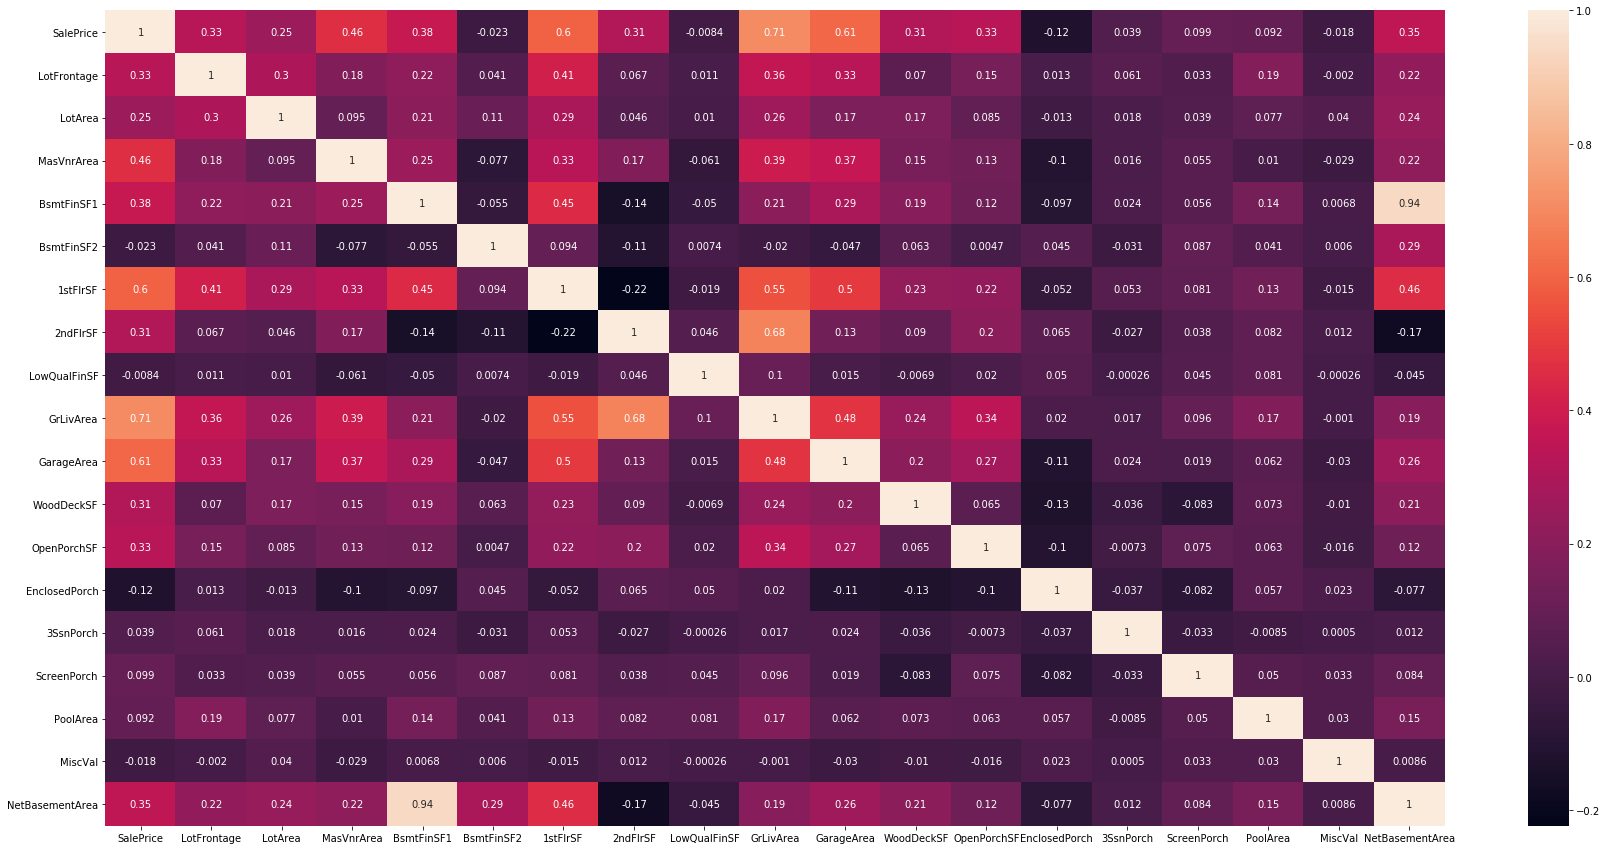

In [57]:
plt.figure(figsize = (30,15))
sns.heatmap(housing_df[['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','NetBasementArea']].corr(),annot = True)
plt.show()

In [58]:
# After looking at this correlaion Matrix BsmtFinSF1 and NetBasementArea - highly correlated so, dropping "NetBasementArea"
housing_df = housing_df.drop(['NetBasementArea'], axis = 1)

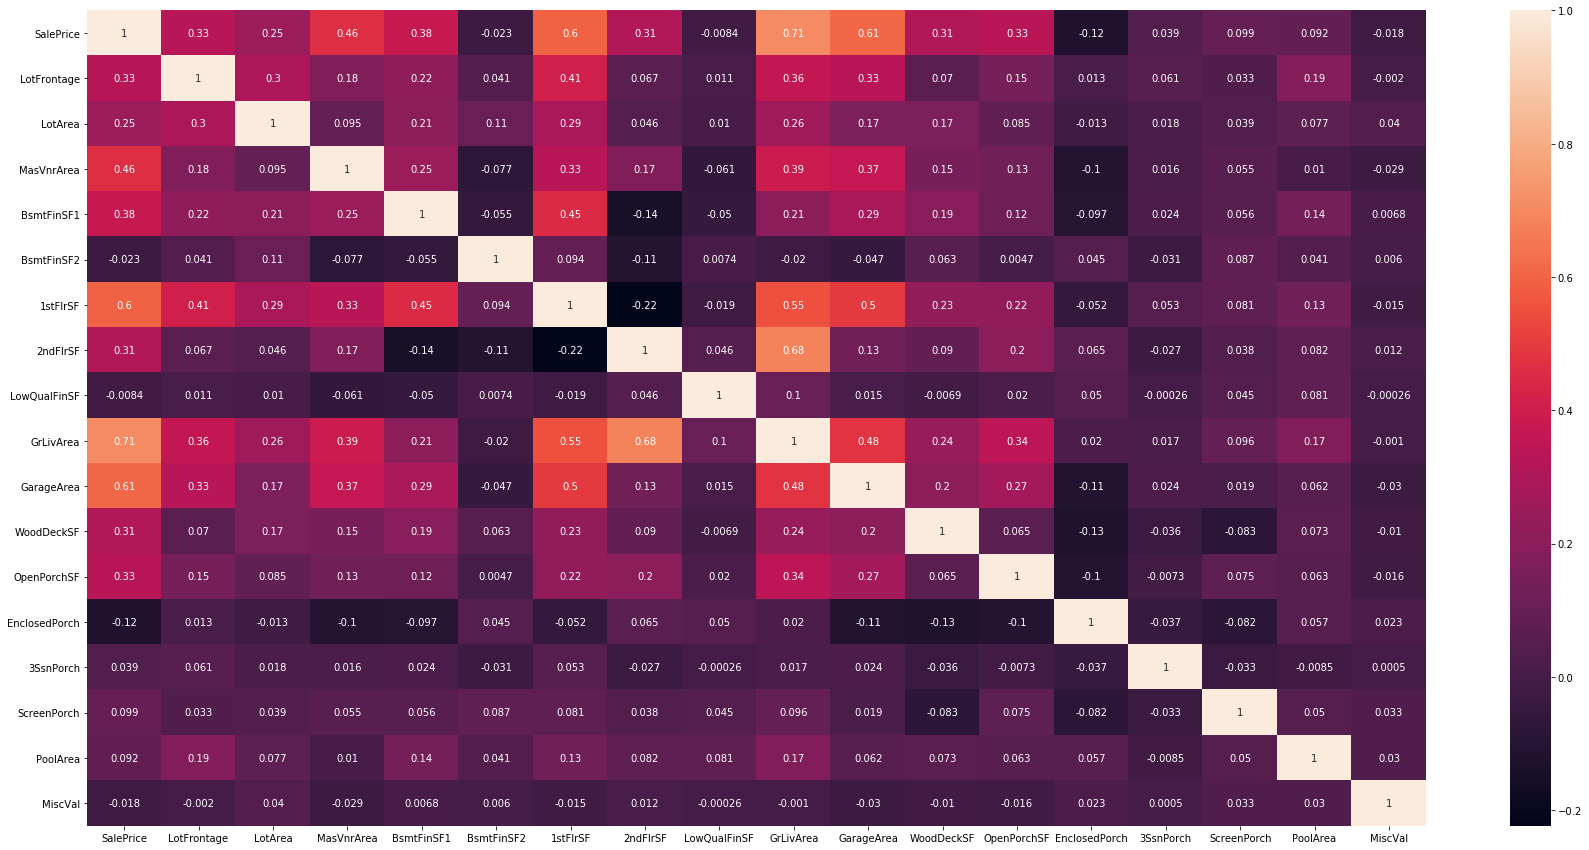

In [59]:
plt.figure(figsize = (30,15))
sns.heatmap(housing_df[['SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].corr(),annot = True)
plt.show()

In [60]:
# Visualising the Categorical Variables via Box Plot
Cat_vars=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']
#Total Number of Categorical variables are 59

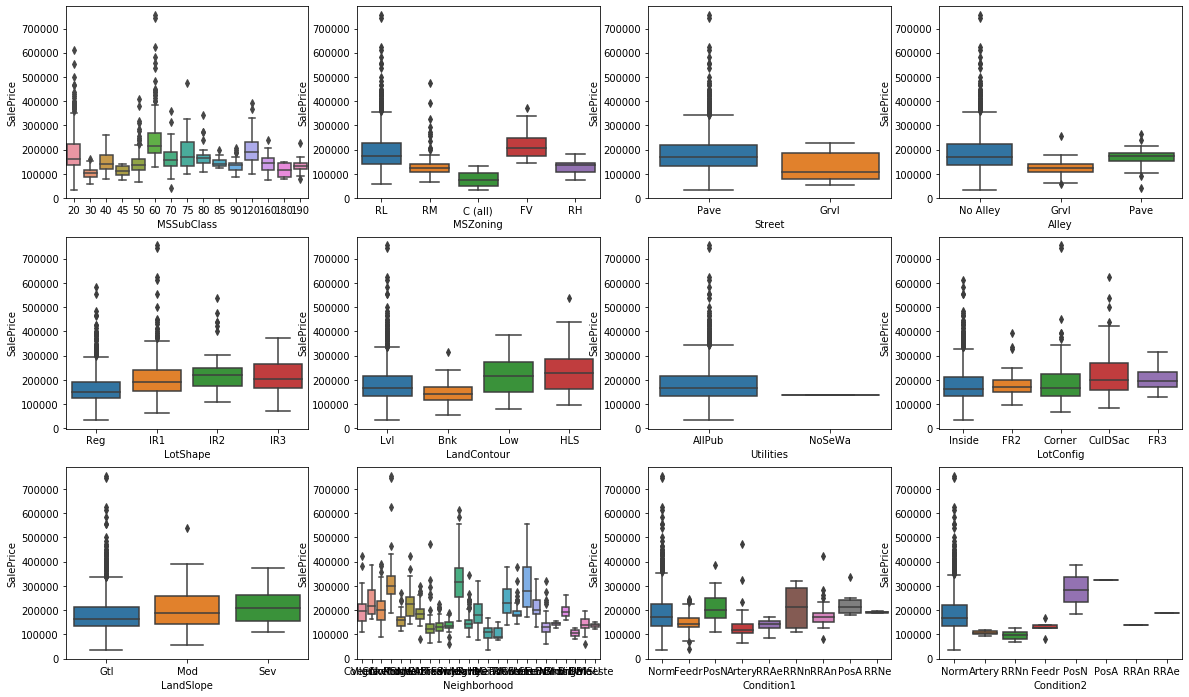

In [61]:
plt.figure(figsize = (20,12))

plt.subplot(3,4,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing_df)


plt.subplot(3,4,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing_df)


plt.subplot(3,4,3)
sns.boxplot(x = 'Street', y = 'SalePrice',data = housing_df)

plt.subplot(3,4,4)
sns.boxplot(x = 'Alley', y = 'SalePrice',data = housing_df)

plt.subplot(3,4,5)
sns.boxplot(x = 'LotShape', y = 'SalePrice',data = housing_df)

plt.subplot(3,4,6)
sns.boxplot(x='LandContour',y = 'SalePrice',data = housing_df)


plt.subplot(3,4,7)
sns.boxplot(x='Utilities',y = 'SalePrice',data = housing_df)

plt.subplot(3,4,8)
sns.boxplot(x='LotConfig',y = 'SalePrice',data = housing_df)

plt.subplot(3,4,9)
sns.boxplot(x='LandSlope',y = 'SalePrice',data = housing_df)

plt.subplot(3,4,10)
sns.boxplot(x='Neighborhood',y = 'SalePrice',data = housing_df)

plt.subplot(3,4,11)
sns.boxplot(x='Condition1',y = 'SalePrice',data = housing_df)

plt.subplot(3,4,12)
sns.boxplot(x='Condition2',y = 'SalePrice',data = housing_df)

plt.show()

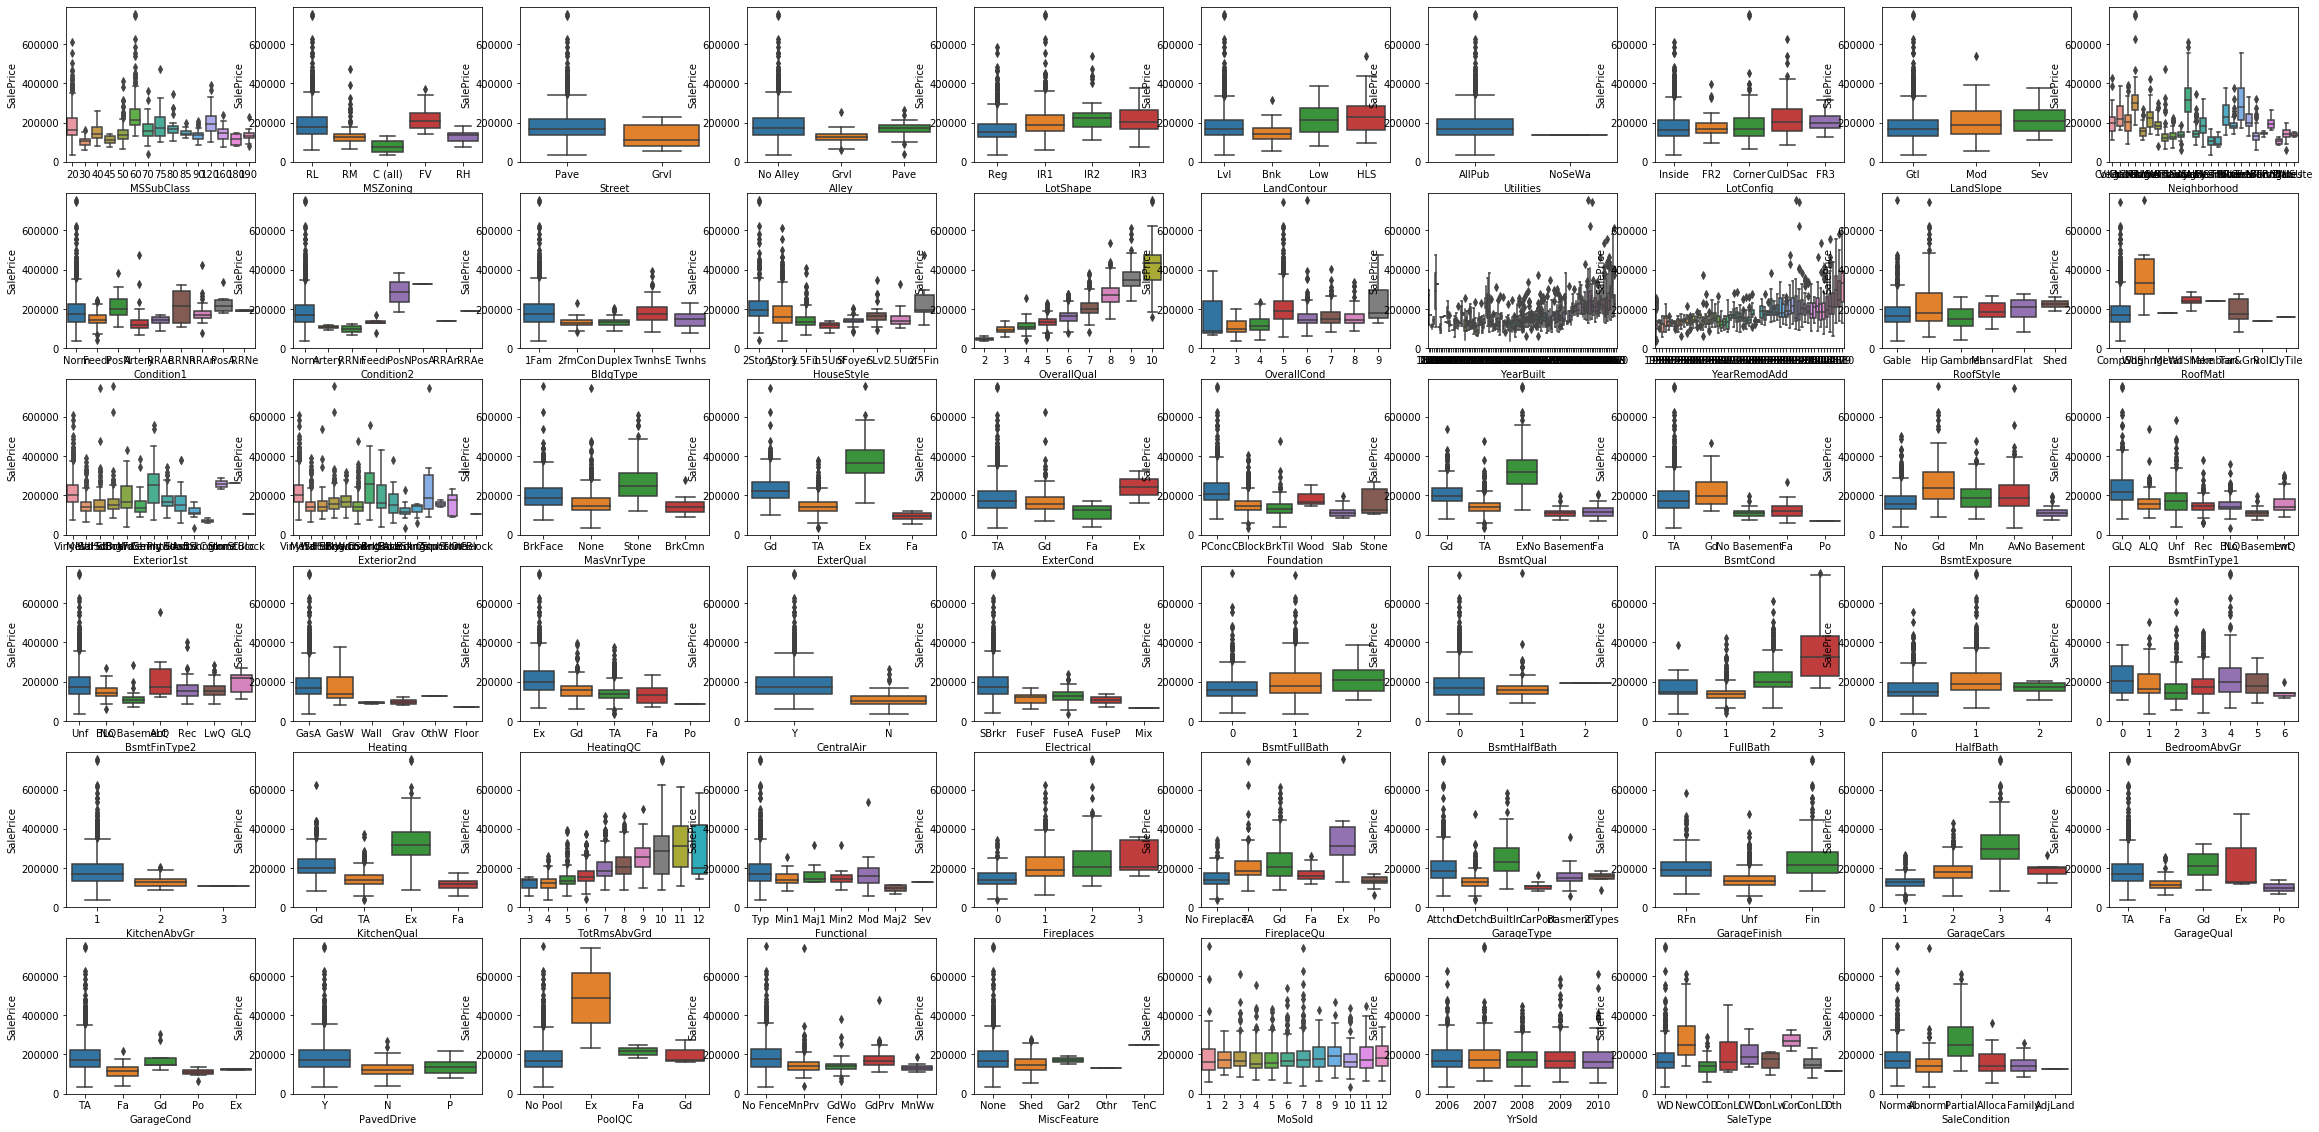

In [62]:
# as there are almost 59 close to 60 variables so, going for for loop
a = 6
b = 10
c = 1
Cat_vars=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']
fig = plt.figure(figsize = (40,20))

for i in Cat_vars:
    plt.subplot(a,b,c)
    sns.boxplot(x = housing_df[i], y = 'SalePrice', data = housing_df)
    c = c+1
    
plt.show()

In [127]:
# So this is coming out to be extremely close and thus, fnding it difficult to read but if I've to explain some of the variances
# this is what I am able to see

# Inference 1: if I see salesprice with sale condition then, I see that SalePrice is more significant when SaleCondition is Partial than Normal and Family
# Inference 2: if I see Salesprice with SaleType then, Salesprice is higher in new and in Low Contract Interest than any other types

# Step 2: Preparing the Data for Modelling
 - Enocding:
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
    
 - Splitting into training and test
 - Rescaling of Variables

In [66]:
# Categorical Variable one: MSSubClass has loads of categories so, first changing it into familiar names as per data definition
#       20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [63]:
housing_df[['MSSubClass']] = housing_df[['MSSubClass']].apply(lambda x:x.map({20:'1Storynew',30:'1Storyold',40:'1Storyfin',45:'1.5Storyunf',50:'1.5Storyfin',60:'2Storynew',70:'2Storyold',75:'2.5Stroryall',80:'SplitorMulti',85:'Splitfoyer',90:'Duplex',120:'1StoryPudNew',160:'2StoryPud',180:'Pud_multi',190:'2FamConv'}))

In [64]:
housing_df['MSSubClass'].value_counts()

1Storynew       521
2Storynew       299
1.5Storyfin     131
1StoryPudNew     87
2StoryPud        61
2Storyold        57
SplitorMulti     57
1Storyold        51
Duplex           40
2FamConv         21
Splitfoyer       20
2.5Stroryall     14
1.5Storyunf       9
Pud_multi         6
1Storyfin         4
Name: MSSubClass, dtype: int64

In [65]:
# added pfix so that get to know this is for dwelling and also removing fist column simultaneously
dwell_sc = pd.get_dummies(housing_df['MSSubClass'],prefix='Mssc',drop_first=True)
dwell_sc.head()

,Mssc_1.5Storyunf,Mssc_1StoryPudNew,Mssc_1Storyfin,Mssc_1Storynew,Mssc_1Storyold,Mssc_2.5Stroryall,Mssc_2FamConv,Mssc_2StoryPud,Mssc_2Storynew,Mssc_2Storyold,Mssc_Duplex,Mssc_Pud_multi,Mssc_Splitfoyer,Mssc_SplitorMulti
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [66]:
# Now nxt MSZoning','Street','Alley
housing_df['MSZoning'].value_counts()

RL         1100
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64

In [67]:
msz= pd.get_dummies(housing_df['MSZoning'],prefix='msz',drop_first=True)
msz.head()

,msz_FV,msz_RH,msz_RL,msz_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [68]:
housing_df['Street'].value_counts()

Pave    1373
Grvl       5
Name: Street, dtype: int64

In [69]:
strt = pd.get_dummies(housing_df['Street'],prefix='strt',drop_first=True)
strt.head()

,strt_Pave
0,1
1,1
2,1
3,1
4,1


In [70]:
housing_df['Alley'].value_counts()

No Alley    1296
Grvl          43
Pave          39
Name: Alley, dtype: int64

In [71]:
ally = pd.get_dummies(housing_df['Alley'],prefix='ally',drop_first=True)
ally.head()

,ally_No Alley,ally_Pave
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [72]:
# Now checng for LotShape','LandContour','Utilities','LotConfig','LandSlope'
housing_df['LotShape'].value_counts()

Reg    860
IR1    467
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [73]:
lots = pd.get_dummies(housing_df['LotShape'],prefix='Ls',drop_first=True)
lots.head()

,Ls_IR2,Ls_IR3,Ls_Reg
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [74]:
housing_df['LandContour'].value_counts()

Lvl    1243
Bnk      54
HLS      48
Low      33
Name: LandContour, dtype: int64

In [75]:
lacnt = pd.get_dummies(housing_df['LandContour'],prefix='Lc',drop_first=True)
lacnt.head()

,Lc_HLS,Lc_Low,Lc_Lvl
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [76]:
housing_df['Utilities'].value_counts()

AllPub    1377
NoSeWa       1
Name: Utilities, dtype: int64

In [77]:
util = pd.get_dummies(housing_df['Utilities'],prefix='Uc',drop_first=True)
util.head()

,Uc_NoSeWa
0,0
1,0
2,0
3,0
4,0


In [78]:
housing_df['LotConfig'].value_counts()

Inside     987
Corner     250
CulDSac     93
FR2         44
FR3          4
Name: LotConfig, dtype: int64

In [79]:
lotcnf = pd.get_dummies(housing_df['LotConfig'],prefix='LotC',drop_first=True)
lotcnf.head()

,LotC_CulDSac,LotC_FR2,LotC_FR3,LotC_Inside
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [80]:
housing_df['LandSlope'].value_counts()

Gtl    1305
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [81]:
lslope = pd.get_dummies(housing_df['LandSlope'],prefix='Lslope',drop_first=True)
lslope.head()

,Lslope_Mod,Lslope_Sev
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [82]:
# processing Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt'
housing_df['Neighborhood'].value_counts()

NAmes      219
CollgCr    148
OldTown    101
Somerst     86
Gilbert     79
Edwards     78
NridgHt     77
NWAmes      73
Sawyer      71
SawyerW     58
Crawfor     51
BrkSide     48
Mitchel     44
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     27
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [83]:
nhood = pd.get_dummies(housing_df['Neighborhood'],prefix='nhood',drop_first=True)
nhood.head()

,nhood_Blueste,nhood_BrDale,nhood_BrkSide,nhood_ClearCr,nhood_CollgCr,nhood_Crawfor,nhood_Edwards,nhood_Gilbert,nhood_IDOTRR,nhood_MeadowV,...,nhood_NoRidge,nhood_NridgHt,nhood_OldTown,nhood_SWISU,nhood_Sawyer,nhood_SawyerW,nhood_Somerst,nhood_StoneBr,nhood_Timber,nhood_Veenker
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [84]:
housing_df['Condition1'].value_counts()

Norm      1194
Feedr       69
Artery      44
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [85]:
con1 = pd.get_dummies(housing_df['Condition1'],prefix='con1',drop_first=True)
con1.head()

,con1_Feedr,con1_Norm,con1_PosA,con1_PosN,con1_RRAe,con1_RRAn,con1_RRNe,con1_RRNn
0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [86]:
con2 = pd.get_dummies(housing_df['Condition2'],prefix='con2',drop_first=True)
con2.head()

,con2_Feedr,con2_Norm,con2_PosA,con2_PosN,con2_RRAe,con2_RRAn,con2_RRNn
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [87]:
housing_df['BldgType'].value_counts()

1Fam      1165
TwnhsE     113
Duplex      40
Twnhs       38
2fmCon      22
Name: BldgType, dtype: int64

In [88]:
bldtyp = pd.get_dummies(housing_df['BldgType'],prefix='bldt',drop_first=True)
bldtyp.head()

,bldt_2fmCon,bldt_Duplex,bldt_Twnhs,bldt_TwnhsE
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [89]:
housing_df['HouseStyle'].value_counts()

1Story    686
2Story    432
1.5Fin    138
SLvl       64
SFoyer     31
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

In [90]:
hstyle = pd.get_dummies(housing_df['HouseStyle'],prefix='hsty',drop_first=True)
hstyle.head()

,hsty_1.5Unf,hsty_1Story,hsty_2.5Fin,hsty_2.5Unf,hsty_2Story,hsty_SFoyer,hsty_SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [91]:
housing_df['OverallQual'].value_counts()

5     364
6     362
7     318
8     167
4      90
9      43
10     18
3      14
2       2
Name: OverallQual, dtype: int64

In [92]:
housing_df[['OverallQual']] = housing_df[['OverallQual']].apply(lambda x:x.map({2:'Poor_OQ',3:'Fair_OQ',4:'Below Avg_OQ',5:'Avg_OQ',6:'Above Avg_OQ',7:'Good_OQ',8:'VGood_OQ',9:'Exc_OQ',10:'VExc_OQ'}))

In [93]:
housing_df['OverallQual'].value_counts()

Avg_OQ          364
Above Avg_OQ    362
Good_OQ         318
VGood_OQ        167
Below Avg_OQ     90
Exc_OQ           43
VExc_OQ          18
Fair_OQ          14
Poor_OQ           2
Name: OverallQual, dtype: int64

In [94]:
OQ = pd.get_dummies(housing_df['OverallQual'],drop_first=True)
OQ.head()

,Avg_OQ,Below Avg_OQ,Exc_OQ,Fair_OQ,Good_OQ,Poor_OQ,VExc_OQ,VGood_OQ
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1


In [95]:
housing_df['OverallCond'].value_counts()

5    793
6    237
7    187
8     68
4     51
9     20
3     19
2      3
Name: OverallCond, dtype: int64

In [97]:
housing_df[['OverallCond']] =housing_df[['OverallCond']].apply(lambda x:x.map({2:'Poor_OC',3:'Fair_OC',4:'Below Avg_OC',5:'Avg_OC',6:'Above Avg_OC',7:'Good_OC',8:'VGood_OC',9:'Exc_OC'}))

In [98]:
housing_df['OverallCond'].value_counts()

Avg_OC          793
Above Avg_OC    237
Good_OC         187
VGood_OC         68
Below Avg_OC     51
Exc_OC           20
Fair_OC          19
Poor_OC           3
Name: OverallCond, dtype: int64

In [99]:
OC = pd.get_dummies(housing_df['OverallCond'],drop_first=True)
OC.head()

,Avg_OC,Below Avg_OC,Exc_OC,Fair_OC,Good_OC,Poor_OC,VGood_OC
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [100]:
housing_df['YearBuilt'].value_counts()

2006    65
2005    64
2004    53
2007    48
2003    45
        ..
1905     1
1906     1
1912     1
1917     1
2010     1
Name: YearBuilt, Length: 109, dtype: int64

In [101]:
# Binning YearBilt columns to make it categorical
bins = [1870,1900,2000,2011]
labels = ['oldest','old','latest']
housing_df['yrbltbin'] = pd.cut(housing_df['YearBuilt'],bins,labels=labels)

In [102]:
housing_df['yrbltbin'].value_counts()

old       997
latest    360
oldest     21
Name: yrbltbin, dtype: int64

In [103]:
housing_df['yrbltbin'].head()

0    latest
1       old
2    latest
3       old
4       old
Name: yrbltbin, dtype: category
Categories (3, object): ['oldest' < 'old' < 'latest']

In [104]:
housing_df = housing_df.drop(['YearBuilt'], axis = 1)

In [105]:
yb = pd.get_dummies(housing_df['yrbltbin'],prefix = 'yrblt',drop_first=True)
yb.head()

,yrblt_old,yrblt_latest
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [106]:
# Similarly binning Remodyr
#YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'
bins = [1950,1999,2000,2011]
labels = ['oldest','old','latest']
housing_df['remodyrbin'] = pd.cut(housing_df['YearRemodAdd'],bins,labels=labels)

In [107]:
housing_df['remodyrbin'].value_counts()

oldest    689
latest    481
old        53
Name: remodyrbin, dtype: int64

In [108]:
housing_df['remodyrbin'].head()

0    latest
1    oldest
2    latest
3    oldest
4       old
Name: remodyrbin, dtype: category
Categories (3, object): ['oldest' < 'old' < 'latest']

In [109]:
housing_df = housing_df.drop(['YearRemodAdd'], axis = 1)

In [110]:
ryb = pd.get_dummies(housing_df['remodyrbin'],prefix = 'ryb',drop_first=True)
ryb.head()

,ryb_old,ryb_latest
0,0,1
1,0,0
2,0,1
3,0,0
4,1,0


In [111]:
housing_df['RoofStyle'].value_counts()

Gable      1069
Hip         279
Flat         12
Gambrel      10
Mansard       6
Shed          2
Name: RoofStyle, dtype: int64

In [112]:
roofs = pd.get_dummies(housing_df['RoofStyle'],prefix = 'roofs',drop_first=True)
roofs.head()

,roofs_Gable,roofs_Gambrel,roofs_Hip,roofs_Mansard,roofs_Shed
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [113]:
housing_df['RoofMatl'].value_counts()

CompShg    1353
Tar&Grv      10
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [114]:
roofmat = pd.get_dummies(housing_df['RoofMatl'],prefix = 'roofmat',drop_first=True)
roofmat.head()

,roofmat_CompShg,roofmat_Membran,roofmat_Metal,roofmat_Roll,roofmat_Tar&Grv,roofmat_WdShake,roofmat_WdShngl
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [115]:
housing_df['Exterior1st'].value_counts()

VinylSd    497
HdBoard    215
MetalSd    205
Wd Sdng    187
Plywood    105
CemntBd     54
BrkFace     49
Stucco      23
WdShing     22
AsbShng     15
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [117]:
ext1 = pd.get_dummies(housing_df['Exterior1st'],prefix = 'ext1',drop_first=True)
ext1.head()

,ext1_BrkComm,ext1_BrkFace,ext1_CBlock,ext1_CemntBd,ext1_HdBoard,ext1_ImStucc,ext1_MetalSd,ext1_Plywood,ext1_Stone,ext1_Stucco,ext1_VinylSd,ext1_Wd Sdng,ext1_WdShing
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


In [118]:
ext2 = pd.get_dummies(housing_df['Exterior2nd'],prefix = 'ext2',drop_first=True)
ext2.head()

,ext2_AsphShn,ext2_Brk Cmn,ext2_BrkFace,ext2_CBlock,ext2_CmentBd,ext2_HdBoard,ext2_ImStucc,ext2_MetalSd,ext2_Other,ext2_Plywood,ext2_Stone,ext2_Stucco,ext2_VinylSd,ext2_Wd Sdng,ext2_Wd Shng
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [119]:
housing_df['MasVnrType'].value_counts()

None       796
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [120]:
masvnr = pd.get_dummies(housing_df['MasVnrType'],prefix = 'masvnr',drop_first=True)
masvnr.head()

,masvnr_BrkFace,masvnr_None,masvnr_Stone
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [121]:
housing_df['ExterQual'].value_counts()

TA    832
Gd    487
Ex     52
Fa      7
Name: ExterQual, dtype: int64

In [122]:
EQ = pd.get_dummies(housing_df['ExterQual'],prefix = 'EQ',drop_first=True)
EQ.head()

,EQ_Fa,EQ_Gd,EQ_TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [123]:
EC = pd.get_dummies(housing_df['ExterCond'],prefix = 'EC',drop_first=True)
EC.head()

,EC_Fa,EC_Gd,EC_TA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [124]:
housing_df['Foundation'].value_counts()

PConc     632
CBlock    588
BrkTil    129
Slab       20
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [125]:
fndn = pd.get_dummies(housing_df['Foundation'],prefix = 'fndn',drop_first=True)
fndn.head()

,fndn_CBlock,fndn_PConc,fndn_Slab,fndn_Stone,fndn_Wood
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [126]:
housing_df['BsmtQual'].value_counts()

Gd             600
TA             595
Ex             121
Fa              32
No Basement     30
Name: BsmtQual, dtype: int64

In [127]:
BQ = pd.get_dummies(housing_df['BsmtQual'],prefix = 'BQ',drop_first=True)
BQ.head()

,BQ_Fa,BQ_Gd,BQ_No Basement,BQ_TA
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [128]:
housing_df['BsmtCond'].value_counts()

TA             1246
Gd               63
Fa               38
No Basement      30
Po                1
Name: BsmtCond, dtype: int64

In [129]:
BC = pd.get_dummies(housing_df['BsmtCond'],prefix = 'BC',drop_first=True)
BC.head()

,BC_Gd,BC_No Basement,BC_Po,BC_TA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [130]:
housing_df['BsmtExposure'].value_counts()

No             895
Av             213
Gd             128
Mn             111
No Basement     31
Name: BsmtExposure, dtype: int64

In [131]:
BE = pd.get_dummies(housing_df['BsmtExposure'],prefix = 'BE',drop_first=True)
BE.head()

,BE_Gd,BE_Mn,BE_No,BE_No Basement
0,0,0,1,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [132]:
# Remaining Cat cols where dummy vars has to be ceated 'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'
housing_df['BsmtFinType1'].value_counts()

GLQ            408
Unf            395
ALQ            209
BLQ            141
Rec            126
LwQ             69
No Basement     30
Name: BsmtFinType1, dtype: int64

In [133]:
# bfar = basement finished area rating
bfar = pd.get_dummies(housing_df['BsmtFinType1'],prefix = 'bfar',drop_first=True)
bfar.head()

,bfar_BLQ,bfar_GLQ,bfar_LwQ,bfar_No Basement,bfar_Rec,bfar_Unf
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0


In [134]:
housing_df['BsmtFinType2'].value_counts()

Unf            1185
Rec              53
LwQ              46
BLQ              32
No Basement      31
ALQ              19
GLQ              12
Name: BsmtFinType2, dtype: int64

In [135]:
bfar2 = pd.get_dummies(housing_df['BsmtFinType2'],prefix = 'bfar2',drop_first=True)
bfar2.head()

,bfar2_BLQ,bfar2_GLQ,bfar2_LwQ,bfar2_No Basement,bfar2_Rec,bfar2_Unf
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [136]:
housing_df['Heating'].value_counts()

GasA     1352
GasW       17
Wall        4
Grav        3
Floor       1
OthW        1
Name: Heating, dtype: int64

In [137]:
heatt = pd.get_dummies(housing_df['Heating'],prefix = 'heatt',drop_first=True)
heatt.head()

,heatt_GasA,heatt_GasW,heatt_Grav,heatt_OthW,heatt_Wall
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [138]:
housing_df['HeatingQC'].value_counts()

Ex    720
TA    396
Gd    221
Fa     40
Po      1
Name: HeatingQC, dtype: int64

In [139]:
hqc = pd.get_dummies(housing_df['HeatingQC'],prefix = 'hqc',drop_first=True)
hqc.head()

,hqc_Fa,hqc_Gd,hqc_Po,hqc_TA
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,0


In [141]:
housing_df['CentralAir'].value_counts()

Y    1309
N      69
Name: CentralAir, dtype: int64

In [142]:
#ca = central air
ca = pd.get_dummies(housing_df['CentralAir'],prefix = 'ca',drop_first=True)
ca.head()

,ca_Y
0,1
1,1
2,1
3,1
4,1


In [143]:
housing_df['Electrical'].value_counts()

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [144]:
electric = pd.get_dummies(housing_df['Electrical'],prefix = 'electric',drop_first=True)
electric.head()

,electric_FuseF,electric_FuseP,electric_Mix,electric_SBrkr
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [145]:
# Remaining Cols where Dummy Vars has to be created
# 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'
housing_df['BsmtFullBath'].value_counts()

0    797
1    568
2     13
Name: BsmtFullBath, dtype: int64

In [146]:
# Leaving few vars as it is like BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars as will just scale them
housing_df['KitchenAbvGr'].value_counts()

1    1326
2      51
3       1
Name: KitchenAbvGr, dtype: int64

In [147]:
housing_df['KitchenQual'].value_counts()

TA    676
Gd    580
Ex     98
Fa     24
Name: KitchenQual, dtype: int64

In [149]:
KQ = pd.get_dummies(housing_df['KitchenQual'],prefix = 'KQ',drop_first=True)
KQ.head()

,KQ_Fa,KQ_Gd,KQ_TA
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [150]:
housing_df['TotRmsAbvGrd'].value_counts()

6     387
7     319
5     254
8     177
4      84
9      72
10     45
11     18
3      12
12     10
Name: TotRmsAbvGrd, dtype: int64

In [151]:
# TotRmsAbvGrd need not be changed
#Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition'
housing_df['Functional'].value_counts()

Typ     1286
Min2      32
Min1      31
Mod       13
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [152]:
func = pd.get_dummies(housing_df['Functional'],prefix = 'func',drop_first= True)
func.head()

,func_Maj2,func_Min1,func_Min2,func_Mod,func_Sev,func_Typ
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [153]:
housing_df['Fireplaces'].value_counts()

1    642
0    617
2    114
3      5
Name: Fireplaces, dtype: int64

In [154]:
housing_df['FireplaceQu'].value_counts()

No Fireplace    617
Gd              376
TA              310
Fa               33
Ex               24
Po               18
Name: FireplaceQu, dtype: int64

In [155]:
FQ = pd.get_dummies(housing_df['FireplaceQu'],prefix = 'FQ',drop_first= True)
FQ.head()

,FQ_Fa,FQ_Gd,FQ_No Fireplace,FQ_Po,FQ_TA
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1


In [156]:
housing_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [157]:
gt = pd.get_dummies(housing_df['GarageType'],prefix = 'gt',drop_first= True)
gt.head()

,gt_Attchd,gt_Basment,gt_BuiltIn,gt_CarPort,gt_Detchd
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [158]:
housing_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    351
Name: GarageFinish, dtype: int64

In [159]:
#gf = Garage Finish
gf = pd.get_dummies(housing_df['GarageFinish'],prefix = 'gf',drop_first= True)
gf.head()

,gf_RFn,gf_Unf
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [160]:
housing_df['GarageCars'].value_counts()

2    823
1    369
3    181
4      5
Name: GarageCars, dtype: int64

In [161]:
housing_df['GarageQual'].value_counts()

TA    1310
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [162]:
GQ = pd.get_dummies(housing_df['GarageQual'],prefix = 'GQ',drop_first= True)
GQ.head()

,GQ_Fa,GQ_Gd,GQ_Po,GQ_TA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [163]:
GC = pd.get_dummies(housing_df['GarageCond'],prefix = 'GC',drop_first= True)
GC.head()

,GC_Fa,GC_Gd,GC_Po,GC_TA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [164]:
housing_df['PavedDrive'].value_counts()

Y    1292
N      58
P      28
Name: PavedDrive, dtype: int64

In [165]:
pdrive = pd.get_dummies(housing_df['PavedDrive'],prefix = 'pdrive',drop_first= True)
pdrive.head()

,pdrive_P,pdrive_Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [166]:
housing_df['PoolQC'].value_counts()

No Pool    1371
Gd            3
Fa            2
Ex            2
Name: PoolQC, dtype: int64

In [167]:
pqc = pd.get_dummies(housing_df['PoolQC'],prefix = 'pqc',drop_first= True)
pqc.head()

,pqc_Fa,pqc_Gd,pqc_No Pool
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [168]:
housing_df['Fence'].value_counts()

No Fence    1113
MnPrv        146
GdPrv         58
GdWo          50
MnWw          11
Name: Fence, dtype: int64

In [169]:
fenc = pd.get_dummies(housing_df['Fence'],prefix = 'fenc',drop_first= True)
fenc.head()

,fenc_GdWo,fenc_MnPrv,fenc_MnWw,fenc_No Fence
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [170]:
housing_df['MiscFeature'].value_counts()

None    1327
Shed      47
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64

In [171]:
mfeat = pd.get_dummies(housing_df['MiscFeature'],prefix = 'mfeat',drop_first= True)
mfeat.head()

,mfeat_None,mfeat_Othr,mfeat_Shed,mfeat_TenC
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [172]:
housing_df['MoSold'].value_counts()

6     243
7     223
5     192
4     131
8     114
3      97
10     87
11     77
9      56
12     54
1      53
2      51
Name: MoSold, dtype: int64

In [173]:
housing_df[['MoSold']] = housing_df[['MoSold']].apply(lambda x:x.map({1:"Mos_jan",2:"Mos_feb",3:"Mos_mar",4:"Mos_apr",5:"Mos_may",6:"Mos_jun",7:"Mos_jul",8:"Mos_aug",9:"Mos_sept",10:"Mos_oct",11:"Mos_nov",12:"Mos_dec"}))

In [174]:
housing_df['MoSold'].value_counts()

Mos_jun     243
Mos_jul     223
Mos_may     192
Mos_apr     131
Mos_aug     114
Mos_mar      97
Mos_oct      87
Mos_nov      77
Mos_sept     56
Mos_dec      54
Mos_jan      53
Mos_feb      51
Name: MoSold, dtype: int64

In [175]:
msold = pd.get_dummies(housing_df['MoSold'],drop_first= True)
msold.head()

,Mos_aug,Mos_dec,Mos_feb,Mos_jan,Mos_jul,Mos_jun,Mos_mar,Mos_may,Mos_nov,Mos_oct,Mos_sept
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


In [176]:
housing_df['YrSold'].value_counts()

2009    323
2007    312
2006    299
2008    280
2010    164
Name: YrSold, dtype: int64

In [177]:
# Binning this YrSold to make it Categorical
bins = [2006,2008,2009,2011]
labels = ['least_recently','recently','very_recently']
housing_df['yrsolbin'] = pd.cut(housing_df['YrSold'],bins,labels=labels)

In [178]:
housing_df['yrsolbin'].value_counts()

least_recently    592
recently          323
very_recently     164
Name: yrsolbin, dtype: int64

In [179]:
# Dropping YearSOld
housing_df = housing_df.drop(['YrSold'], axis = 1)

In [180]:
ysold = pd.get_dummies(housing_df['yrsolbin'],prefix = "ysold",drop_first= True)
ysold.head()

,ysold_recently,ysold_very_recently
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [181]:
housing_df['SaleType'].value_counts()

WD       1193
New       120
COD        43
ConLD       7
ConLI       4
ConLw       4
CWD         4
Con         2
Oth         1
Name: SaleType, dtype: int64

In [182]:
#salet = sale type
salet = pd.get_dummies(housing_df['SaleType'],prefix = "salet",drop_first= True)
salet.head()

,salet_CWD,salet_Con,salet_ConLD,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [183]:
housing_df['SaleCondition'].value_counts()

Normal     1136
Partial     123
Abnorml      87
Family       20
Alloca       11
AdjLand       1
Name: SaleCondition, dtype: int64

In [184]:
salec = pd.get_dummies(housing_df['SaleCondition'],prefix = 'salec',drop_first= True)
salec.head()

,salec_AdjLand,salec_Alloca,salec_Family,salec_Normal,salec_Partial
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


In [185]:
# Now let us see the columns thate have
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       '

In [ ]:
# Now first concatenating these data frames
#[dwell_sc,msz,strt,ally,lots,lacnt,util,lotcnf,lslope,nhood,con1,con2,bldtyp,hstyle,OQ,OC,yb,ryb,roofs,roofmat,ext1,ext2,masvnr,EQ,EC,fndn,BQ,BC,BE,bfar,bfar2,heatt,hqc,ca,electric,KQ,func,FQ,gt,gf,GQ,GC,pdrive,pqc,fenc,mfeat,msold,ysold,salet,salec]


In [186]:
housing_df = pd.concat([housing_df,dwell_sc],axis = 1)

In [187]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Mssc_1Storyold,Mssc_2.5Stroryall,Mssc_2FamConv,Mssc_2StoryPud,Mssc_2Storynew,Mssc_2Storyold,Mssc_Duplex,Mssc_Pud_multi,Mssc_Splitfoyer,Mssc_SplitorMulti
0,2Storynew,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,0
1,1Storynew,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,2Storynew,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,0
3,2Storyold,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,0,0,0
4,2Storynew,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,0,0


In [188]:
housing_df = pd.concat([housing_df,msz,strt,ally],axis = 1)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Mssc_Pud_multi,Mssc_Splitfoyer,Mssc_SplitorMulti,msz_FV,msz_RH,msz_RL,msz_RM,strt_Pave,ally_No Alley,ally_Pave
0,2Storynew,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,1,1,0
1,1Storynew,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,1,1,0
2,2Storynew,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,1,1,0
3,2Storyold,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,1,0,1,1,0
4,2Storynew,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,1,0,1,1,0


In [189]:
housing_df = pd.concat([housing_df,lots,lacnt,util,lotcnf,lslope,nhood,con1,con2,bldtyp,hstyle,OQ,OC,yb,ryb,roofs,roofmat,ext1,ext2,masvnr,EQ,EC,fndn,BQ,BC,BE,bfar,bfar2,heatt,hqc,ca,electric,KQ,func,FQ,gt,gf,GQ,GC,pdrive,pqc,fenc,mfeat,msold,ysold,salet,salec],axis = 1)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD,salec_AdjLand,salec_Alloca,salec_Family,salec_Normal,salec_Partial
0,2Storynew,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,1Storynew,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,2Storynew,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,2Storyold,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,2Storynew,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [190]:
# the columns that has to be dropped
red_var = ['Alley','MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','yrbltbin','remodyrbin','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','MoSold','yrsolbin','SaleType','SaleCondition']
housing_df = housing_df.drop(housing_df[red_var], axis =1)

In [191]:
housing_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD,salec_AdjLand,salec_Alloca,salec_Family,salec_Normal,salec_Partial
0,65.0,8450,196.0,706,0,856,854,0,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,1262,0,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,920,866,0,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,961,756,0,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,1145,1053,0,2198,1,...,0,0,0,0,1,0,0,0,1,0


In [192]:
# checking the info to see data types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Columns: 291 entries, LotFrontage to salec_Partial
dtypes: float64(3), int64(25), uint8(263)
memory usage: 706.1 KB


In [193]:
housing_df.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'salet_ConLI', 'salet_ConLw', 'salet_New', 'salet_Oth', 'salet_WD',
       'salec_AdjLand', 'salec_Alloca', 'salec_Family', 'salec_Normal',
       'salec_Partial'],
      dtype='object', length=291)

### Test - Train Split

In [194]:
df_train, df_test = train_test_split(housing_df, train_size = 0.8, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1102, 291)
(276, 291)


### Rescaling of Variables using Min - Max Scaling as here coeffcients are very important

In [195]:
# 1. Instantiate an object
scaler  = MinMaxScaler()
# create a list of numeric_vars
num_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
# 2. Fit on Data now again there is a nuamce here; You don't want to scale all the variables.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\Upasana\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Upasana\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD,salec_AdjLand,salec_Alloca,salec_Family,salec_Normal,salec_Partial
772,0.453416,0.029668,0.000000,0.186726,0.086160,0.231805,0.000000,0.0,0.151811,0.5,...,0,0,0,0,1,0,0,0,0,0
992,0.366460,0.038748,0.290598,0.237168,0.079376,0.196507,0.402421,0.0,0.326740,0.0,...,0,0,0,0,1,0,0,0,1,0
56,0.018634,0.005464,0.389744,0.287168,0.000000,0.183042,0.366102,0.0,0.300048,0.5,...,0,0,0,0,1,0,0,0,0,0
447,0.298137,0.045549,0.000000,0.000000,0.000000,0.173217,0.450363,0.0,0.335081,0.0,...,0,0,0,0,1,0,0,0,1,0
703,0.341615,0.028784,0.000000,0.000000,0.000000,0.200873,0.377724,0.0,0.317445,0.0,...,0,0,0,0,1,0,0,0,1,0


In [196]:
#to look at all numerical variables; min 0.0 and max 1.0
df_train[num_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,...,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,0.304534,0.043327,0.092494,0.200159,0.032244,0.256826,0.168928,0.007317,0.252330,0.216425,...,0.293103,0.280303,0.112707,0.091036,0.039722,0.009654,0.032980,0.004363,0.003255,0.209839
std,0.123862,0.047476,0.150875,0.195948,0.109943,0.137693,0.211941,0.070685,0.119471,0.256846,...,0.210471,0.148868,0.147934,0.123897,0.112536,0.073166,0.121031,0.059521,0.036049,0.110064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.029382,0.000000,0.000000,0.000000,0.153566,0.000000,0.000000,0.166349,0.000000,...,0.000000,0.182114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138517
50%,0.298137,0.037999,0.000000,0.173894,0.000000,0.231623,0.000000,0.000000,0.239276,0.000000,...,0.333333,0.263415,0.000000,0.051188,0.000000,0.000000,0.000000,0.000000,0.000000,0.186454
75%,0.366460,0.048472,0.145940,0.323894,0.000000,0.342795,0.358596,0.000000,0.313394,0.500000,...,0.333333,0.342886,0.196033,0.135283,0.000000,0.000000,0.000000,0.000000,0.000000,0.256450
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Now, scaling the test set as well

In [197]:
# create a list of numeric_vars
# num_vars = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

# 1. Transform on Data now;
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

C:\Users\Upasana\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Upasana\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD,salec_AdjLand,salec_Alloca,salec_Family,salec_Normal,salec_Partial
150,0.614907,0.041536,0.000000,0.316814,0.0,0.177948,0.000000,0.0,0.116540,0.0,...,0,0,0,0,1,0,0,0,1,0
30,0.180124,0.032853,0.000000,0.000000,0.0,0.061499,0.323487,0.0,0.199476,0.0,...,0,0,0,0,1,0,0,0,1,0
609,0.248447,0.030248,0.164103,0.399558,0.0,0.199782,0.000000,0.0,0.130839,0.5,...,0,0,0,0,1,0,0,0,1,0
1344,0.397516,0.045030,0.000000,0.000000,0.0,0.090247,0.352542,0.0,0.232602,0.0,...,0,0,1,0,0,0,0,0,0,1
1204,0.354037,0.040525,0.000000,0.348673,0.0,0.216157,0.000000,0.0,0.141563,0.5,...,0,0,0,0,1,0,0,0,1,0


In [198]:
# Checking the min and max
df_test.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,salet_ConLI,salet_ConLw,salet_New,salet_Oth,salet_WD,salec_AdjLand,salec_Alloca,salec_Family,salec_Normal,salec_Partial
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.0,276.000000,276.0,276.000000,276.000000,276.000000,276.000000
mean,0.315195,0.042335,0.093457,0.208001,0.034307,0.241709,0.179521,0.006904,0.247587,0.211957,...,0.003623,0.003623,0.072464,0.0,0.880435,0.0,0.010870,0.018116,0.815217,0.076087
std,0.177616,0.049157,0.181731,0.231077,0.117794,0.152357,0.216884,0.068271,0.139771,0.258320,...,0.060193,0.060193,0.259725,0.0,0.325042,0.0,0.103877,0.133613,0.388826,0.265619
min,0.000000,-0.000828,0.000000,0.000000,0.000000,-0.015284,0.000000,0.000000,-0.010010,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.027848,0.000000,0.000000,0.000000,0.139738,0.000000,0.000000,0.147045,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.298137,0.037758,0.000000,0.186947,0.000000,0.211790,0.000000,0.000000,0.232245,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.360248,0.046140,0.147436,0.319137,0.000000,0.322962,0.351453,0.000000,0.302788,0.500000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.813665,0.736888,1.367521,2.497345,0.764586,1.532751,0.869734,0.826923,1.230219,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [199]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

## Step 3:Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [200]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [201]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 58),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 50),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 19),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 122),
 ('BsmtHalfBath', False, 179),
 ('FullBath', True, 1),
 ('HalfBath', False, 131),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 24),
 ('Fireplaces', False, 55),
 ('GarageYrBlt', False, 237),
 ('GarageCars', False, 35),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 70),
 ('OpenPorchSF', False, 169),
 ('EnclosedPorch', False, 232),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 130),
 ('Mssc_1.5Storyunf', False, 160),
 ('Mssc_1StoryPudNew', False, 31),
 ('Mssc_1Storyfin', False, 208),
 ('Mssc_1Storynew', False, 233),
 ('Mssc_1Storyold', False, 57),
 ('Mssc_2.5Stroryall', False, 33),
 ('Mssc_2FamConv', False, 53),
 ('Mssc_2StoryPud', False, 6

In [202]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'msz_FV', 'msz_RH', 'msz_RL',
       'msz_RM', 'Uc_NoSeWa', 'Lslope_Sev', 'nhood_NoRidge', 'nhood_StoneBr',
       'con2_PosA', 'con2_PosN', 'con2_RRAe', 'Exc_OQ', 'VExc_OQ', 'VGood_OQ',
       'Below Avg_OC', 'Fair_OC', 'roofs_Shed', 'roofmat_CompShg',
       'roofmat_Membran', 'roofmat_Metal', 'roofmat_Roll', 'roofmat_Tar&Grv',
       'roofmat_WdShake', 'ext1_CBlock', 'ext1_ImStucc', 'ext2_CBlock',
       'ext2_Other', 'EC_Fa', 'EC_Gd', 'EC_TA', 'fndn_Wood', 'func_Sev',
       'func_Typ', 'pqc_Fa', 'pqc_No Pool', 'salet_Con', 'salet_New'],
      dtype='object')

In [203]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars',
       ...
       'salet_ConLD', 'salet_ConLI', 'salet_ConLw', 'salet_Oth', 'salet_WD',
       'salec_AdjLand', 'salec_Alloca', 'salec_Family', 'salec_Normal',
       'salec_Partial'],
      dtype='object', length=240)

In [204]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [205]:
X_train_rfe.head()

,LotArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,...,EC_Fa,EC_Gd,EC_TA,fndn_Wood,func_Sev,func_Typ,pqc_Fa,pqc_No Pool,salet_Con,salet_New
772,0.029668,0.186726,0.231805,0.000000,0.0,0.151811,0.333333,0.500000,0.0,0.416260,...,0,0,1,0,0,1,0,1,0,0
992,0.038748,0.237168,0.196507,0.402421,0.0,0.326740,0.666667,0.500000,0.0,0.227642,...,0,0,1,0,0,1,0,1,0,0
56,0.005464,0.287168,0.183042,0.366102,0.0,0.300048,0.666667,0.500000,0.0,0.260163,...,0,0,1,0,0,1,0,1,0,0
447,0.045549,0.000000,0.173217,0.450363,0.0,0.335081,0.666667,0.666667,0.0,0.220325,...,0,0,1,0,0,1,0,1,0,0
703,0.028784,0.000000,0.200873,0.377724,0.0,0.317445,0.666667,0.666667,0.5,0.416260,...,0,1,0,0,0,1,0,1,0,0


In [206]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

In [207]:
X_test_rfe.head()

,LotArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,GarageArea,...,EC_Fa,EC_Gd,EC_TA,fndn_Wood,func_Sev,func_Typ,pqc_Fa,pqc_No Pool,salet_Con,salet_New
150,0.041536,0.316814,0.177948,0.000000,0.0,0.116540,0.333333,0.5,0.0,0.227642,...,0,0,1,0,0,1,0,1,0,0
30,0.032853,0.000000,0.061499,0.323487,0.0,0.199476,0.333333,0.5,0.0,0.073171,...,1,0,0,0,0,1,0,1,0,0
609,0.030248,0.399558,0.199782,0.000000,0.0,0.130839,0.333333,0.5,0.0,0.082114,...,1,0,0,0,0,1,0,1,0,0
1344,0.045030,0.000000,0.090247,0.352542,0.0,0.232602,0.666667,0.5,0.0,0.227642,...,0,0,1,0,0,1,0,1,0,1
1204,0.040525,0.348673,0.216157,0.000000,0.0,0.141563,0.333333,0.5,0.0,0.272358,...,0,0,1,0,0,1,0,1,0,0


In [208]:
## Print the coefficients and intercept
lm.fit(X_train_rfe, y_train)
print(lm.intercept_)
print(lm.coef_)

-0.2903934423659477
[ 0.22502462  0.07880768  0.183772    0.10770887 -0.04879956  0.16670899
  0.05670874 -0.06709314 -0.12623875  0.07329607  0.03251137  0.0343521
  0.3618318   0.07010651  0.0473382   0.06452046  0.04884112 -0.04054292
 -0.0681931   0.03853906  0.05034229 -0.12169469 -0.44219493 -0.21115051
  0.14273154  0.22694229  0.04790756 -0.032354   -0.04792094  0.1754111
 -0.04363448  0.14066297  0.02776409 -0.05276778 -0.04083273 -0.08885228
 -0.03103555 -0.05596884 -0.03103555 -0.05242506  0.04419233  0.03632797
  0.04117439 -0.0764411  -0.12709617  0.03358956 -0.0661373   0.24394026
  0.06625332  0.04725981]


In [209]:
# Now finding R2 square which describes the variance that test/train data is able to predict
# along with RSS(Residual sum of squares),MSE(Mean Square Error)
# Note the lesser the RSS and MSE the better the model

In [210]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lm = r2_score(y_train, y_pred_train)
print(r2_train_lm)
metric.append(r2_train_lm)

r2_test_lm = r2_score(y_test, y_pred_test)
print(r2_test_lm)
metric.append(r2_test_lm)

0.8882630391872741
0.5429881510621211


In [ ]:
# Here, R2 of test data is way too less than the train data which is clearly signalling overfitting

In [211]:
rss1_lm = np.sum(np.square(y_train - y_pred_train))
print(rss1_lm)
metric.append(rss1_lm)

rss2_lm = np.sum(np.square(y_test - y_pred_test))
print(rss2_lm)
metric.append(rss2_lm)

mse_train_lm = mean_squared_error(y_train, y_pred_train)
print(mse_train_lm)
metric.append(mse_train_lm**0.5)

mse_test_lm = mean_squared_error(y_test, y_pred_test)
print(mse_test_lm)
metric.append(mse_test_lm**0.5)

1.4903072252447684
1.4936867871285426
0.0013523659031259242
0.005411908649016459


In [275]:
#Also, mse of test data is higher than mse of train data
# Clearly it seems have to go for Ridge and Lasso due to such difference in R2 values along with mse

In [212]:
# Residual analysis on Training Data
y_res = y_train - y_pred_train
#y_res

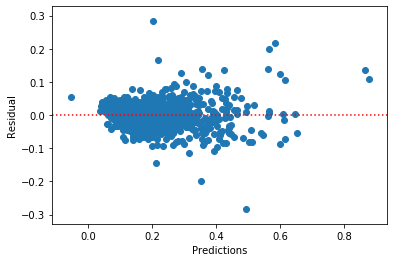

In [213]:
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [ ]:
# Inferences from this Residual vs Prediction values
# 1) There is no definite shape present here
# 2) Though, there are extreme points present in the data so,will check for non linearity

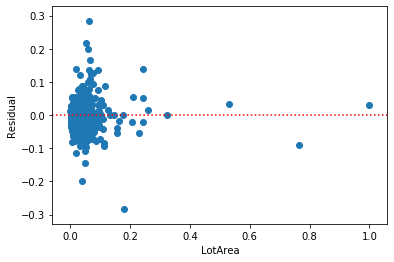

In [214]:
plt.scatter( X_train_rfe['LotArea'] , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("LotArea")
plt.ylabel("Residual")
plt.show()

## Step 4: Building a regularized model using Ridge and Lasso Regression

In [311]:
# list of alphas(Lambda's) to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 40,50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 40,
                                   50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [312]:
# Printing the best hyperparameter alpha/lambda
print(model_cv.best_params_)

{'alpha': 0.6}


In [220]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.14329404  0.08082552  0.17726444  0.10163008 -0.04045034  0.16059371
  0.0590136  -0.05750203 -0.12090261  0.07472394  0.02760056  0.03217026
  0.0443642   0.05466059  0.02896429  0.05009443  0.03291755 -0.02371387
 -0.02719163  0.04301076  0.04967857 -0.06442359 -0.30732728 -0.0525997
  0.14314697  0.19672068  0.04809447 -0.03275888 -0.04733562  0.05182656
 -0.05020857  0.06564735 -0.00807235 -0.03823205 -0.04676307 -0.06516427
 -0.02380973 -0.03711652 -0.02380973 -0.03194997  0.0241417   0.01776335
  0.02251854 -0.0425302  -0.07617282  0.0328732  -0.05341816 -0.01271978
  0.05256149  0.04697829]


In [221]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.883216255760869
0.5483143150501942
1.557619399747375
1.4762788779166611
0.0014134477311682169
0.005348836514190801


In [228]:
# Now checking this Ridge Model for alpha(Lambda)= 0.7
#Fitting Ridge model for alpha = 0.7 and printing coefficients which have been penalised
alpha = 0.7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.13632923  0.0811516   0.17617337  0.10091692 -0.03879872  0.15975334
  0.0594716  -0.05628937 -0.11987795  0.07483623  0.02702556  0.03214188
  0.04130331  0.05289896  0.02689144  0.04846541  0.0311172  -0.02219228
 -0.0242411   0.04351272  0.04950706 -0.05925677 -0.29255204 -0.04604909
  0.1431189   0.19353465  0.04819722 -0.03273068 -0.04721535  0.04606643
 -0.04971635  0.06098926 -0.00863964 -0.03597346 -0.04635199 -0.06250011
 -0.02289486 -0.03520619 -0.02289486 -0.02999204  0.02228619  0.01610941
  0.02086117 -0.03947233 -0.07127691  0.03276554 -0.05096448 -0.01462176
  0.05079219  0.04694689]


In [229]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8822785303066625
0.5529186823453871
1.570126443160182
1.4612300720533122
0.0014247971353540671
0.005294311855265624


In [230]:
# Now checking this Ridge Model for alpha(Lambda)= 0.8
#Fitting Ridge model for alpha = 0.8 and printing coefficients which have been penalised
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.13016561  0.08145968  0.17509975  0.10024439 -0.03725301  0.15892995
  0.05991602 -0.05514295 -0.11885557  0.07494876  0.02649907  0.03211736
  0.03889488  0.05128621  0.02500257  0.04698027  0.02947374 -0.0208497
 -0.02169864  0.043975    0.04933837 -0.05472187 -0.27908318 -0.04085207
  0.1430702   0.19060949  0.04829827 -0.03270525 -0.0470923   0.04138945
 -0.04918119  0.05703549 -0.00893213 -0.03394546 -0.0458102  -0.06003883
 -0.02204504 -0.03348935 -0.02204504 -0.02825532  0.02065037  0.01466171
  0.0194098  -0.03679756 -0.06699887  0.03266204 -0.04868779 -0.01599998
  0.04914093  0.0469254 ]


In [231]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.881351310867944
0.5572279708826622
1.5824933611330594
1.4471456946678862
0.0014360193839682935
0.005243281502419877


In [232]:
# Now checking this Ridge Model for alpha(Lambda)= 0.9
#Fitting Ridge model for alpha = 0.9 and printing coefficients which have been penalised
alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.1246585   0.08175212  0.17404442  0.09960761 -0.03580534  0.15812277
  0.06034613 -0.0540559  -0.11783951  0.07506232  0.02601365  0.03209468
  0.03693725  0.04980356  0.02327487  0.04562118  0.02796714 -0.01965616
 -0.01947991  0.04440274  0.04917218 -0.05071299 -0.26675019 -0.03664398
  0.14300289  0.18790638  0.04839711 -0.0326818  -0.04696607  0.03751802
 -0.04862775  0.05362772 -0.00904486 -0.03212257 -0.04518471 -0.05775396
 -0.02125402 -0.03193749 -0.02125402 -0.02670431  0.01919754  0.01338559
  0.01812986 -0.03443959 -0.06322571  0.03256212 -0.04657587 -0.0170255
  0.04759648  0.04691293]


In [233]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.880439186134172
0.5612613294299874
1.5946589513833898
1.4339631603771603
0.0014470589395493554
0.005195518697018697


In [234]:
# Now checking this Ridge Model for alpha(Lambda)= 1.0
#Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.11969895  0.08203074  0.17300787  0.0990026  -0.03444771  0.15733124
  0.06076179 -0.05302231 -0.11683256  0.07517707  0.02556324  0.03207263
  0.03530563  0.04843526  0.02168912  0.04437308  0.02658066 -0.01858813
 -0.01752371  0.04480009  0.04900818 -0.04714656 -0.25541232 -0.03317812
  0.14291879  0.18539443  0.04849346 -0.03265971 -0.04683658  0.03426214
 -0.04807119  0.0506533  -0.00903867 -0.03048029 -0.04450701 -0.05562458
 -0.02051619 -0.03052746 -0.02051619 -0.02531071  0.01789874  0.01225371
  0.01699411 -0.03234635 -0.05987088  0.03246536 -0.04461546 -0.01780358
  0.04614887  0.04690858]


In [235]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8795450769533041
0.5650412267812019
1.606584256696092
1.4216090327033748
0.0014578804507224064
0.0051507573648673


In [236]:
# Now checking this Ridge Model for alpha(Lambda)= 3.0
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.07098855  0.08583179  0.15591393  0.09061649 -0.0183069   0.14420948
  0.06669861 -0.03883804 -0.09947502  0.07734284  0.01995298  0.0314286
  0.02305628  0.03333099  0.00524442  0.03128731  0.01160894 -0.00876048
 -0.00059181  0.04932637  0.04597987 -0.01586721 -0.13471343 -0.01133997
  0.13933016  0.15467201  0.04996307 -0.03222127 -0.04388079  0.01152056
 -0.04012245  0.02518725 -0.00546274 -0.01540585 -0.03185127 -0.03078234
 -0.01205889 -0.01633335 -0.01205889 -0.0121561   0.00592484  0.00262705
  0.00731532 -0.01395258 -0.02945119  0.03093464 -0.02323756 -0.020245
  0.02890684  0.0476642 ]


In [237]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8655306568489063
0.610862575014006
1.7935035302049234
1.271847614957161
0.0016274986662476619
0.004608143532453482


In [238]:
# Now checking this Ridge Model for alpha(Lambda)= 5.0
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.05323288  0.08770402  0.14374221  0.08541559 -0.01119431  0.13464815
  0.06995417 -0.03044547 -0.08664255  0.07870343  0.01676228  0.03048141
  0.01925708  0.02692994 -0.0004616   0.02646416  0.00549384 -0.00565928
  0.00406136  0.05109585  0.04328599 -0.00707455 -0.08862923 -0.0070957
  0.13451442  0.13781773  0.05092991 -0.03166362 -0.04094209  0.00658647
 -0.03630615  0.01716681 -0.00345776 -0.01071936 -0.02420666 -0.02001771
 -0.00854227 -0.01113021 -0.00854227 -0.0077709   0.00195911  0.00021059
  0.00490485 -0.00855411 -0.01963424  0.02981684 -0.01505529 -0.01921917
  0.02121487  0.04880454]


In [239]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8558213219100209
0.633643104813089
1.9230031327222525
1.1973922667123422
0.001745011917170828
0.004338377777943269


In [240]:
# Now checking this Ridge Model for alpha(Lambda)= 7.0
#Fitting Ridge model for alpha = 7 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 4.37287259e-02  8.85023132e-02  1.34452454e-01  8.15438427e-02
 -7.26706780e-03  1.27194141e-01  7.18558952e-02 -2.45829424e-02
 -7.68052124e-02  7.93165984e-02  1.45362025e-02  2.94348336e-02
  1.71237768e-02  2.31975282e-02 -3.06042273e-03  2.40170718e-02
  1.95648331e-03 -4.16659878e-03  5.89539896e-03  5.18244856e-02
  4.09021155e-02 -3.25575868e-03 -6.45715405e-02 -5.28640698e-03
  1.29620444e-01  1.25810272e-01  5.16605934e-02 -3.10366327e-02
 -3.83219497e-02  4.60011184e-03 -3.40155662e-02  1.31044822e-02
 -2.41634219e-03 -8.38430085e-03 -1.93264780e-02 -1.40760083e-02
 -6.63679120e-03 -8.37680333e-03 -6.63679120e-03 -5.56261718e-03
 -9.86392558e-05 -6.91933612e-04  4.04633155e-03 -6.05915003e-03
 -1.47124170e-02  2.89036456e-02 -1.08075796e-02 -1.81453454e-02
  1.68309206e-02  4.98456632e-02]


In [241]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8478147622183893
0.6483484039875846
2.0297917340140934
1.1493298124701503
0.001841916274059976
0.004164238450978805


In [242]:
# Now checking this Ridge Model for alpha(Lambda)= 9.0
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.03769916  0.08862312  0.12699681  0.07841732 -0.00483873  0.12110373
  0.0729572  -0.02017495 -0.06900737  0.07940621  0.01287389  0.028381
  0.01566216  0.02068034 -0.00438189  0.02256949 -0.00046636 -0.00329875
  0.0066958   0.05202163  0.03879807 -0.00125005 -0.04993069 -0.00425292
  0.12493015  0.11642306  0.05224992 -0.03038297 -0.03602724  0.00357668
 -0.0323778   0.01062289 -0.00179876 -0.00694764 -0.01593875 -0.01035737
 -0.00544805 -0.00665763 -0.00544805 -0.00422962 -0.00138113 -0.00108744
  0.00371862 -0.00465041 -0.01173813  0.02811416 -0.00823253 -0.01719198
  0.01398696  0.05071933]


In [243]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8406049321098586
0.658890585932667
2.125953843895882
1.1148739927458458
0.001929177716783922
0.00403939852444147


In [244]:
# Now checking this Ridge Model for alpha(Lambda)= 15.0
#Fitting Ridge model for alpha = 15 and printing coefficients which have been penalised
alpha = 15.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.02787287  0.08683196  0.11089885  0.07140451 -0.00130489  0.1075915
  0.0737567  -0.01161131 -0.05295967  0.07796837  0.00969761  0.02546762
  0.01293     0.0162948  -0.00561746  0.02053467 -0.00498232 -0.00205441
  0.00712049  0.05117845  0.03379724  0.00112675 -0.02803722 -0.00269849
  0.11255176  0.09667901  0.05349807 -0.0284455  -0.0306719   0.00229457
 -0.02897324  0.00679359 -0.00091684 -0.00465619 -0.01004301 -0.00470829
 -0.00360649 -0.00395791 -0.00360649 -0.00222215 -0.00336818 -0.00142021
  0.00366164 -0.00270325 -0.00722616  0.02617299 -0.00440446 -0.01496195
  0.00935387  0.0524407 ]


In [245]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8210255902644235
0.6776991793509031
2.3870960336024227
1.053400428026278
0.0021661488508188955
0.003816668217486515


In [246]:
# Now checking this Ridge Model for alpha(Lambda)= 19.0
#Fitting Ridge model for alpha = 19 and printing coefficients which have been penalised
alpha = 19.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.02424242  0.08478437  0.10317949  0.06783482 -0.00026257  0.10092134
  0.07323103 -0.00803387 -0.04587405  0.07634227  0.00838842  0.02379324
  0.01174724  0.01460492 -0.00566412  0.01994745 -0.00694613 -0.00166045
  0.00690684  0.05010803  0.03125741  0.00166111 -0.02091625 -0.00215745
  0.10561061  0.08751336  0.05403189 -0.02724225 -0.02800498  0.00193165
 -0.02725497  0.00547483 -0.00064774 -0.0038276  -0.00783877 -0.00288742
 -0.00297739 -0.00302227 -0.00297739 -0.00155648 -0.00401164 -0.00147036
  0.00382089 -0.00211075 -0.00570713  0.02510133 -0.00317203 -0.01383879
  0.00769168  0.05302831]


In [247]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.8088083772250103
0.6841871758263931
2.550044808408533
1.032195212815997
0.0023140152526393222
0.003739837727594192


In [248]:
# Now checking this Ridge Model for alpha(Lambda)= 24.0
#Fitting Ridge model for alpha = 19 and printing coefficients which have been penalised
alpha = 24.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.0211135   0.08188578  0.09546722  0.06408871  0.00045499  0.09412473
  0.07203244 -0.00485454 -0.03931506  0.07405446  0.00722009  0.02197806
  0.01062204  0.01314835 -0.00548177  0.01954411 -0.00882377 -0.0013545
  0.00651992  0.04858283  0.02868773  0.00194668 -0.0153799  -0.00170874
  0.09812397  0.07862477  0.05445705 -0.02586188 -0.02534014  0.00165726
 -0.02542858  0.0043986  -0.00044906 -0.00312967 -0.006001   -0.00150947
 -0.00246709 -0.0022633  -0.00246709 -0.00103103 -0.00447531 -0.00151478
  0.00404341 -0.00166177 -0.00448917  0.0239273  -0.00222434 -0.0126979
  0.0063108   0.05334112]


In [249]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.7940939540832702
0.6882923878488321
2.7463004695965774
1.0187778343157914
0.0024921056892890903
0.0036912240373760557


In [250]:
# Now checking this Ridge Model for alpha(Lambda)= 27.0
#Fitting Ridge model for alpha = 27 and printing coefficients which have been penalised
alpha = 27.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.01968637  0.08008835  0.09156505  0.06211547  0.00071506  0.09063351
  0.07115435 -0.00340739 -0.03621505  0.07264023  0.00668048  0.0210167
  0.01007114  0.01249299 -0.00532612  0.01939572 -0.00974384 -0.0012259
  0.00627484  0.04763559  0.02738869  0.00201975 -0.01307396 -0.00151134
  0.09415718  0.07424789  0.05460753 -0.02509819 -0.02400524  0.00154132
 -0.0244586   0.00393062 -0.00037021 -0.00281931 -0.00520009 -0.00095476
 -0.00224572 -0.00193668 -0.00224572 -0.00080969 -0.00464464 -0.0015457
  0.0041706  -0.00147675 -0.00396772  0.0232924  -0.00183424 -0.01211695
  0.00570353  0.05336417]


In [251]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.7855112989935219
0.6892229754686905
2.8607728232296195
1.0157363236081842
0.0025959825982119957
0.0036802040710441457


In [252]:
# Now checking this Ridge Model for alpha(Lambda)= 30.0
#Fitting Ridge model for alpha = 30 and printing coefficients which have been penalised
alpha = 30.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.01848624  0.07829392  0.0880745   0.06030233  0.00089736  0.08748006
  0.07020931 -0.00220888 -0.0335725   0.07122972  0.00622587  0.02013767
  0.00958795  0.01195    -0.00515995  0.01928838 -0.01054852 -0.0011232
  0.00603387  0.04668876  0.02623258  0.00205269 -0.01125372 -0.00134985
  0.09052268  0.07040829  0.05469243 -0.02437981 -0.02282405  0.00144715
 -0.02356511  0.00354998 -0.00031011 -0.00256361 -0.00455229 -0.00052956
 -0.00206557 -0.0016736  -0.00206557 -0.00063387 -0.00476025 -0.00158168
  0.00428924 -0.00133091 -0.00354815  0.02270093 -0.00152919 -0.01159661
  0.00520646  0.0532937 ]


In [253]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.777097616897316
0.6892768834607877
2.9729914761058494
1.0155601319936705
0.0026978144066296273
0.003679565695629241


In [254]:
# Now checking this Ridge Model for alpha(Lambda)= 35.0
#Fitting Ridge model for alpha = 30 and printing coefficients which have been penalised
alpha = 35.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 1.68493324e-02  7.53661960e-02  8.29794535e-02  5.75696390e-02
  1.08881138e-03  8.28245097e-02  6.85548762e-02 -6.26263110e-04
 -2.99406693e-02  6.89279109e-02  5.60767982e-03  1.88298718e-02
  8.89804065e-03  1.12253432e-02 -4.88274101e-03  1.91655502e-02
 -1.16874999e-02 -9.91122224e-04  5.65295568e-03  4.51403124e-02
  2.45610879e-02  2.05532429e-03 -8.95993880e-03 -1.13763817e-03
  8.50945765e-02  6.49395763e-02  5.47109159e-02 -2.32748434e-02
 -2.11279070e-02  1.32218818e-03 -2.22196276e-02  3.05205360e-03
 -2.37763810e-04 -2.22461830e-03 -3.71584343e-03 -1.63411590e-05
 -1.82917816e-03 -1.33446769e-03 -1.82917816e-03 -4.11060722e-04
 -4.87018438e-03 -1.65180897e-03  4.46666906e-03 -1.14637509e-03
 -3.00657554e-03  2.17976739e-02 -1.14978266e-03 -1.08377416e-02
  4.55171062e-03  5.30165857e-02]


In [255]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.7634336623044871
0.6878385399303018
3.155236367205395
1.0202611801871293
0.002863190895830667
0.0036965984789388744


In [324]:
# Now checking this Ridge Model for alpha(Lambda)= 45.0
#Fitting Ridge model for alpha = 30 and printing coefficients which have been penalised
alpha = 45.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.01445042  0.06990566  0.07474732  0.05292524  0.00124353  0.07516863
  0.06518521  0.00150421 -0.02463911  0.06461903  0.00471392  0.01667973
  0.00781992  0.01020291 -0.00437894  0.01901864 -0.01341412 -0.00081381
  0.0049872   0.04223406  0.02191583  0.00197193 -0.00602535 -0.00084777
  0.07609508  0.05646258  0.05439437 -0.02136146 -0.01847371  0.00114245
 -0.01995629  0.00237275 -0.00015259 -0.00175385 -0.0026125   0.0005826
 -0.00150298 -0.00088582 -0.00150298 -0.00012501 -0.00490813 -0.00181614
  0.00475234 -0.00090546 -0.00228417  0.02023912 -0.00067681 -0.00961874
  0.00364898  0.05206549]


In [325]:
# Now calculating r2,rss and mse for this Ridge regression model
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_rm = r2_score(y_train, y_pred_train)
print(r2_train_rm)
metric2.append(r2_train_rm)

r2_test_rm = r2_score(y_test, y_pred_test)
print(r2_test_rm)
metric2.append(r2_test_rm)

rss1_rm = np.sum(np.square(y_train - y_pred_train))
print(rss1_rm)
metric2.append(rss1_rm)

rss2_rm = np.sum(np.square(y_test - y_pred_test))
print(rss2_rm)
metric2.append(rss2_rm)

mse_train_rm = mean_squared_error(y_train, y_pred_train)
print(mse_train_rm)
metric2.append(mse_train_rm**0.5)

mse_test_rm = mean_squared_error(y_test, y_pred_test)
print(mse_test_rm)
metric2.append(mse_test_rm**0.5)

0.7373943689365888
0.6809749552810154
3.502539057060077
1.0426939589581914
0.00317834760168791
0.0037778766628919977


In [326]:
#for lambda = 45 
print(metric2)

[0.7373943689365888, 0.6809749552810154, 3.502539057060077, 1.0426939589581914, 0.056376835683531495, 0.061464434129763185]


In [327]:
#ridge coefficients
print(ridge.coef_)

[ 0.01445042  0.06990566  0.07474732  0.05292524  0.00124353  0.07516863
  0.06518521  0.00150421 -0.02463911  0.06461903  0.00471392  0.01667973
  0.00781992  0.01020291 -0.00437894  0.01901864 -0.01341412 -0.00081381
  0.0049872   0.04223406  0.02191583  0.00197193 -0.00602535 -0.00084777
  0.07609508  0.05646258  0.05439437 -0.02136146 -0.01847371  0.00114245
 -0.01995629  0.00237275 -0.00015259 -0.00175385 -0.0026125   0.0005826
 -0.00150298 -0.00088582 -0.00150298 -0.00012501 -0.00490813 -0.00181614
  0.00475234 -0.00090546 -0.00228417  0.02023912 -0.00067681 -0.00961874
  0.00364898  0.05206549]


In [ ]:
# Now, as with Lambda(alpha) = 45 for Ridge Regression R2 of the train and test set is quite close like 73 for train and 68% for test; I am stopping here
# and will now look for Lasso Regression

## Lasso Regression

In [258]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [259]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [296]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [297]:
lasso.coef_

array([ 0.11164651,  0.08371963,  0.21196111,  0.12241908, -0.0077528 ,
        0.12218233,  0.05542032, -0.05152447, -0.11977378,  0.06841339,
        0.006416  ,  0.02184614,  0.01086435,  0.02336981, -0.        ,
        0.01908615,  0.        , -0.        , -0.        ,  0.03980811,
        0.04355459, -0.01602343, -0.35448073, -0.        ,  0.14430039,
        0.20569426,  0.04900611, -0.03028209, -0.04532182,  0.        ,
       -0.01382924,  0.00762408,  0.        , -0.        , -0.00760857,
       -0.00965781, -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.00398553, -0.        , -0.01481109,
        0.03248935, -0.        , -0.        ,  0.01298986,  0.04752225])

In [298]:
# Now calculating r2,rss and mse for this Lasso regression model

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lar = r2_score(y_train, y_pred_train)
print(r2_train_lar)
metric3.append(r2_train_lar)

r2_test_lar = r2_score(y_test, y_pred_test)
print(r2_test_lar)
metric3.append(r2_test_lar)

rss1_lar = np.sum(np.square(y_train - y_pred_train))
print(rss1_lar)
metric3.append(rss1_lar)

rss2_lar = np.sum(np.square(y_test - y_pred_test))
print(rss2_lar)
metric3.append(rss2_lar)

mse_train_lar = mean_squared_error(y_train, y_pred_train)
print(mse_train_lar)
metric3.append(mse_train_lar**0.5)

mse_test_lar = mean_squared_error(y_test, y_pred_test)
print(mse_test_lar)
metric3.append(mse_test_lar**0.5)

0.8757001544605498
0.5833248235678027
1.6578664441636881
1.3618513546370374
0.0015044160110378295
0.004934244038539991


In [308]:
# Now checking for other Lambda Values
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [309]:
lasso.coef_

array([ 0.        ,  0.09192037,  0.04384277,  0.        , -0.        ,
        0.29628547,  0.05654314, -0.        , -0.0449381 ,  0.0666937 ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.00730128, -0.0112273 , -0.        ,  0.        ,  0.02966685,
        0.        , -0.        , -0.        , -0.        ,  0.13311683,
        0.11342348,  0.05807479, -0.01579818, -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.02252981, -0.        , -0.        ,  0.        ,  0.04732983])

In [310]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lar = r2_score(y_train, y_pred_train)
print(r2_train_lar)
metric3.append(r2_train_lar)

r2_test_lar = r2_score(y_test, y_pred_test)
print(r2_test_lar)
metric3.append(r2_test_lar)

rss1_lar = np.sum(np.square(y_train - y_pred_train))
print(rss1_lar)
metric3.append(rss1_lar)

rss2_lar = np.sum(np.square(y_test - y_pred_test))
print(rss2_lar)
metric3.append(rss2_lar)

mse_train_lar = mean_squared_error(y_train, y_pred_train)
print(mse_train_lar)
metric3.append(mse_train_lar**0.5)

mse_test_lar = mean_squared_error(y_test, y_pred_test)
print(mse_test_lar)
metric3.append(mse_test_lar**0.5)

0.811361254413378
0.6709857433580382
2.5159954545392837
1.0753424644572382
0.0022831174723586967
0.003896168349482747


In [302]:
# Now checking for other Lambda Values
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [303]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lar = r2_score(y_train, y_pred_train)
print(r2_train_lar)
metric3.append(r2_train_lar)

r2_test_lar = r2_score(y_test, y_pred_test)
print(r2_test_lar)
metric3.append(r2_test_lar)

rss1_lar = np.sum(np.square(y_train - y_pred_train))
print(rss1_lar)
metric3.append(rss1_lar)

rss2_lar = np.sum(np.square(y_test - y_pred_test))
print(rss2_lar)
metric3.append(rss2_lar)

mse_train_lar = mean_squared_error(y_train, y_pred_train)
print(mse_train_lar)
metric3.append(mse_train_lar**0.5)

mse_test_lar = mean_squared_error(y_test, y_pred_test)
print(mse_test_lar)
metric3.append(mse_test_lar**0.5)

0.8686803744933711
0.609931740926808
1.7514937339040002
1.2748899312128288
0.0015893772539963705
0.004619166417437786


In [304]:
# Now checking for other Lambda Values
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.00009

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=9e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [305]:
lasso.coef_

array([ 0.11566168,  0.08320372,  0.21831725,  0.12748444, -0.00995169,
        0.11335139,  0.05556408, -0.05278602, -0.12064919,  0.06882813,
        0.00799993,  0.02233528,  0.01361917,  0.02485535,  0.        ,
        0.02047277,  0.00165155, -0.        , -0.        ,  0.0396346 ,
        0.04406579, -0.03052   , -0.36306183, -0.        ,  0.14430838,
        0.20807056,  0.04886276, -0.03042325, -0.04559369,  0.        ,
       -0.01616286,  0.01581356,  0.        , -0.        , -0.01059159,
       -0.01457293, -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.00384734, -0.        , -0.02566834,
        0.03261489, -0.        , -0.        ,  0.01841681,  0.04750524])

In [306]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lar = r2_score(y_train, y_pred_train)
print(r2_train_lar)
metric3.append(r2_train_lar)

r2_test_lar = r2_score(y_test, y_pred_test)
print(r2_test_lar)
metric3.append(r2_test_lar)

rss1_lar = np.sum(np.square(y_train - y_pred_train))
print(rss1_lar)
metric3.append(rss1_lar)

rss2_lar = np.sum(np.square(y_test - y_pred_test))
print(rss2_lar)
metric3.append(rss2_lar)

mse_train_lar = mean_squared_error(y_train, y_pred_train)
print(mse_train_lar)
metric3.append(mse_train_lar**0.5)

mse_test_lar = mean_squared_error(y_test, y_pred_test)
print(mse_test_lar)
metric3.append(mse_test_lar**0.5)

0.8769703067789032
0.5785314745659158
1.6409256113055632
1.3775178238694081
0.0014890432044515093
0.004991006608222493


In [314]:
# for Lasso Regression Lambda value alpha = 0.001 looks great as in this the difference between the train and test error is less as compared to other value

In [315]:
# Now checking for other Lambda Values
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [316]:
print(lasso.coef_)

[ 0.          0.09192037  0.04384277  0.         -0.          0.29628547
  0.05654314 -0.         -0.0449381   0.0666937   0.          0.
  0.          0.         -0.          0.00730128 -0.0112273  -0.
  0.          0.02966685  0.         -0.         -0.         -0.
  0.13311683  0.11342348  0.05807479 -0.01579818 -0.          0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.02252981 -0.         -0.
  0.          0.04732983]


In [317]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lar = r2_score(y_train, y_pred_train)
print(r2_train_lar)
metric3.append(r2_train_lar)

r2_test_lar = r2_score(y_test, y_pred_test)
print(r2_test_lar)
metric3.append(r2_test_lar)

rss1_lar = np.sum(np.square(y_train - y_pred_train))
print(rss1_lar)
metric3.append(rss1_lar)

rss2_lar = np.sum(np.square(y_test - y_pred_test))
print(rss2_lar)
metric3.append(rss2_lar)

mse_train_lar = mean_squared_error(y_train, y_pred_train)
print(mse_train_lar)
metric3.append(mse_train_lar**0.5)

mse_test_lar = mean_squared_error(y_test, y_pred_test)
print(mse_test_lar)
metric3.append(mse_test_lar**0.5)

0.811361254413378
0.6709857433580382
2.5159954545392837
1.0753424644572382
0.0022831174723586967
0.003896168349482747


## Step 5: Model Evaluation and Predictor Values(Beta Coefficients)

In [320]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.888263,0.737394,0.811361
1,R2 Score (Test),0.542988,0.680975,0.670986
2,RSS (Train),1.490307,3.502539,2.515995
3,RSS (Test),1.493687,1.042694,1.075342
4,MSE (Train),0.036775,0.056377,0.047782
5,MSE (Test),0.073566,0.061464,0.062419


In [330]:
# As I see that for Ridge Regesion with(lamda = 45)the difference between test and train error is quite less as compared to
# Lasso(lambda = 0.001) and even the residual sum of squares is significantly low for test data as compared to lasso's RSS for test data
# so will finally go for Ridge Regression over Lasso Regression

## Final Betas after Regularization

In [321]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [322]:
betas.rows = X_train_rfe.columns

C:\Users\Upasana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [328]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [329]:
betas.head(50)

,Linear,Ridge,Lasso
LotArea,0.225025,0.014450,0.000000
BsmtFinSF1,0.078808,0.069906,0.091920
1stFlrSF,0.183772,0.074747,0.043843
2ndFlrSF,0.107709,0.052925,0.000000
LowQualFinSF,-0.048800,0.001244,-0.000000
GrLivArea,0.166709,0.075169,0.296285
FullBath,0.056709,0.065185,0.056543
BedroomAbvGr,-0.067093,0.001504,-0.000000
KitchenAbvGr,-0.126239,-0.024639,-0.044938
GarageArea,0.073296,0.064619,0.066694
